<a href="https://colab.research.google.com/github/DaraSamii/machine-learning-packages-summary/blob/main/FastSummary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authorizing

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/programming/DataDays2021/fastai_Prac

pwd = %pwd
pwd

Mounted at /content/drive
/content/drive/MyDrive/programming/DataDays2021/fastai_Prac


'/content/drive/MyDrive/programming/DataDays2021/fastai_Prac'

# Upgading FastAi

In [ ]:
!pip install --upgrade fastai

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.1)


# Importing packages

In [ ]:
from fastai.vision.all import *
from fastai import *
import regex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# FastAI URLs

fastai.URLS contains urls for downlaoding example datasets 
[FastAI doc](https://docs.fast.ai/data.external.html)

In [ ]:
l = dir(URLs)
a = [x for x in l if "__" not in x]
a.remove('path')
a.remove('URL')
pd.DataFrame(np.array(a).reshape(11,6))

0              1  ...                      4              5
0         ADULT_SAMPLE        AG_NEWS  ...         BIWI_HEAD_POSE    BIWI_SAMPLE
1          CALTECH_101         CAMVID  ...                  CIFAR      CIFAR_100
2          COCO_SAMPLE      COCO_TINY  ...                   DOGS        FLOWERS
3                 FOOD  HUMAN_NUMBERS  ...         IMAGENETTE_320      IMAGEWANG
4        IMAGEWANG_160  IMAGEWANG_320  ...          IMAGEWOOF_320           IMDB
5          IMDB_SAMPLE     LOCAL_PATH  ...                    MDL        ML_100k
6            ML_SAMPLE          MNIST  ...    MNIST_VAR_SIZE_TINY     MT_ENG_FRA
7   OPENAI_TRANSFORMER    PASCAL_2007  ...          PLANET_SAMPLE    PLANET_TINY
8                   S3        S3_AUDI  ...            S3_IMAGELOC       S3_MODEL
9               S3_NLP     SIIM_SMALL  ...               WIKITEXT  WIKITEXT_TINY
10           WT103_BWD      WT103_FWD  ...  YELP_REVIEWS_POLARITY    ZEBRA_FINCH

[11 rows x 6 columns]

# downloading data

with function untar_data(url, fname, dest)

Download **url** to **fname** if **dest** doesn't exist, and un-tgz or unzip to folder dest.

In [ ]:
path = untar_data(URLs.PETS, fname = None, dest = None)

print("\n path: ",path)
print("\n path.ls(): ",path.ls())
print("\n path.home(): ",path.home())
print("\n path.parts: ",path.parts)



 path:  /root/.fastai/data/oxford-iiit-pet

 path.ls():  [Path('/root/.fastai/data/oxford-iiit-pet/annotations'), Path('/root/.fastai/data/oxford-iiit-pet/images')]

 path.home():  /root

 path.parts:  ('/', 'root', '.fastai', 'data', 'oxford-iiit-pet')


# DataLoaders

DataLoaders are easier way for wrapping datasets

**Vision**:
* <font color=red>ImageDataLoaders:</font>
 * <font color=green>`ImageDataLoaders.from_folder(path,train='train', valid='valid')`:</font>
>Create from imagenet style dataset in **path** with **train** and **valid** subfolders
 * <font color=green>`ImageDataLoaders.from_path_func(path, fnames, label_func)`:</font>
 >Create from list of **fnames** in **paths** with **label_func**
 * <font color=green>`ImageDataLoaders.from_path_re(path, fnames, pat)`:
 >Create from list of **fnames** in **paths** with re expression **pat**
 * <font color=green>`ImageDataLoaders.from_name_func(path, fnames, label_func)`:</font>
 >Create from the name attrs of **fnames** in **paths** with **label_func**
 * <font color=green>`ImageDataLoaders.from_name_re(path, fnames, pat)`:
 > Create from the name attrs of **fnames** in **paths** with re expression **pat**
 * <font color=green>`ImageDataLoaders.from_df(df, path='.', fn_col=0, label_col=1)`:</font>
 >Create from df using **fn_col** and **label_col**
 * <font color=green>`ImageDataLoaders.from_csv(ath, csv_fname='labels.csv',fn_col=0)`:</font>
 > Create from **path/csv_fname** using **fn_col** and **label_col**
 * <font color=green>`ImageDataLoaders.from_lists(path, fnames, labels)`:</font>
 > Create from list of **fnames** and **labels** in **path**

* <font color=red>SegmentationDataLoaders:</font>
 *  <font color=green>`SegmentationDataLoaders.from_label_func(path, fnames, label_func)`:</font>
 > Create from list of **fnames** in **paths** with **label_func**


 **Text**:
 * <font color=red>TextDataLoaders</font>:
  * <font color=green>`TextDataLoaders.from_folder(path, train='train', valid='valid')`</font>:
  >Create from imagenet style dataset in **path** with **train** and **valid** subfolders

  * <font color=green>`TextDataLoaders.from_df(df, path='.',text_col=0, label_col=1,is_lm=False)`</font>:
  
  * <font color=green>`TextDataLoaders.from_csv(path, csv_fname='labels.csv',text_col=0, label_col=1, is_lm=False)`</font>



## Vision 

In [ ]:
path = untar_data(URLs.MNIST_TINY)
dls = ImageDataLoaders.from_folder(path)
dls.show_batch()

## Text

In [ ]:
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/"texts.csv")
dls = TextDataLoaders.from_df(df, path=path, text_col='text', label_col='label', valid_col='is_valid')

---
# DataBlock


different kinds of Data Blocks

## Target DataBlocks

* **CategoryBlock** : for single-label categorical targets

* **MultiCategoryBlock** : for multi-label categorical targets

* **RegressionBlock** : for float targets 

[link to FastAI doc](https://https://docs.fast.ai/data.block.html#RegressionBlock)







## Image DataBlocks

* **ImageBlock** : simple DataBlock for Images

* **MaskBlock(code = None)** : for <font color=purple>segmentation masks</font>, potentially with codes

* **PointBlock** :  for <font color=purple>points</font> in an image

* **BBoxBlock** : for <font color=purple>bounding boxes</font> in an image

* **BBoxLblBlock** : for <font color=purple>labeled bounding boxes</font>, potentially with vocab

[link to FastAI doc](https://docs.fast.ai/vision.data.html#BBoxLblBlock)



---
## transforms

### [link to FastAI docs](https://docs.fast.ai/data.transforms.html)

### get_x, get_items

* **get_image_files(path, recurse=True, folders=None)** : Get image files in `path` recursively, only in `folders`, if specified. [[github]](https://github.com/fastai/fastai/blob/d7779196359c8e497a80e2f7f85c327318777c1a/fastai/data/transforms.py#L57)



* **get_text_files(path, recurse=True, folders=None)** : Get text files in `path` recursively, only in `folders`, if specified. [[github]](https://github.com/fastai/fastai/blob/d7779196359c8e497a80e2f7f85c327318777c1a/fastai/data/transforms.py#L68)

### Splitter

* **RandomSplitter(valid_pct, seed)** : Create function that splits items between train/val with valid_pct randomly

* **TrainTestSplitter(test_size,random_state,stratify,train_size,shuffle)** : Split items into random train and test subsets using sklearn train_test_split utility.

* **IndexSplitter(valid_idx)** :  Split items so that val_idx are in the validation set and the others in the training set

* **GrandparentSplitter(train_name, valid_name)** :  Split items from the grand parent folder names (train_name and valid_name).

* **FuncSplitter(func)** : Split items by result of func (True for validation, False for training set).

* **MaskSplitter(mask)** : Split items depending on the value of mask.

* **FileSplitter(fname)** : Split items by providing file fname (contains names of valid items separated by newline).

* **ColSplitter(col)** : Split items (supposed to be a dataframe) by value in col

* **RandomSubsetSplitter(train_sz,valid_sz,seed)** : Take randoms subsets of splits with train_sz and valid_sz.


### label

* **parent_label** : Label item with the parent folder name.

* **RegexLabeller(pat, match)** : Label item with regex pat.

* **ColReader(cols, pref, suff, label_delim)** : Read cols in row with potential pref and suff.<font color=red> (can be used for get_x too)</font>

### augmentation
[link to FastAI Doc](https://docs.fast.ai/vision.augment.html)

## DataBlock and Trasforms Example

In [ ]:
db = DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items = get_image_files,
               get_y = RegexLabeller(r"([\w]+(?=_))"),
               item_tfms = Resize(230),
               splitter = RandomSplitter(),
               batch_tfms = aug_transforms(),
               )

with `db.summary()` we can print out the sumary of the steps on the data giving the path of data folder and batchsize

In [ ]:
db.summary(path/"images",bs=1,)

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Bengal_73.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Bengal_73.jpg
    applying RegexLabeller gives
      Bengal
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(1))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up 


## DataBlock.dataloaders

now with `db.dataloaders` we make the DataLoader.


>`DataBlock.dataloaders(source, path='.', verbose=False, bs=64, shuffle=False, num_workers=None, do_setup=True, pin_memory=False, timeout=0, batch_size=None, drop_last=False, indexed=None, n=None, device=None, persistent_workers=False, wif=None, before_iter=None, after_item=None, before_batch=None, after_batch=None, after_iter=None, create_batches=None, create_item=None, create_batch=None, retain=None, get_idxs=None, sample=None, shuffle_fn=None, do_batch=None)`

In [ ]:
dls = db.dataloaders(path/"images",verbose=True, bs =128)

print("\n\n count of batches in train dataset:",len(dls.train))

print("\n\n count of batches in valid dataset:",len(dls.valid))

dls = db.dataloaders(path/"images",verbose=True, bs =64)

print("\n\n count of batches in train dataset:",len(dls.train))

print("\n\n count of batches in valid dataset:",len(dls.valid))

print("\n\n number of calsses:", dls.c)

Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (230, 230), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1} -> Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5} -> Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}


 count of batches in train dataset: 46


 count of batches in valid dataset: 12
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (230, 230), 'method': '

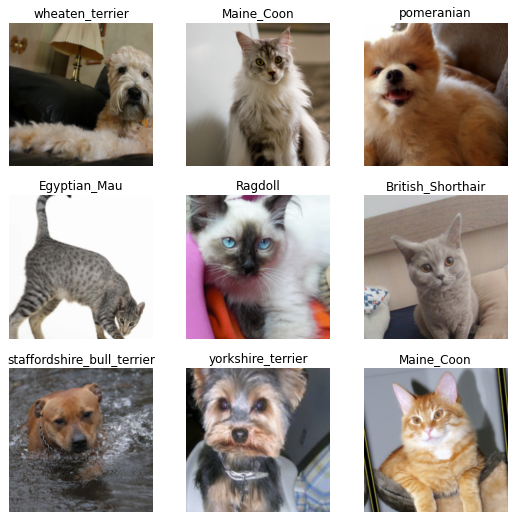

In [ ]:
dls.train.show_batch()

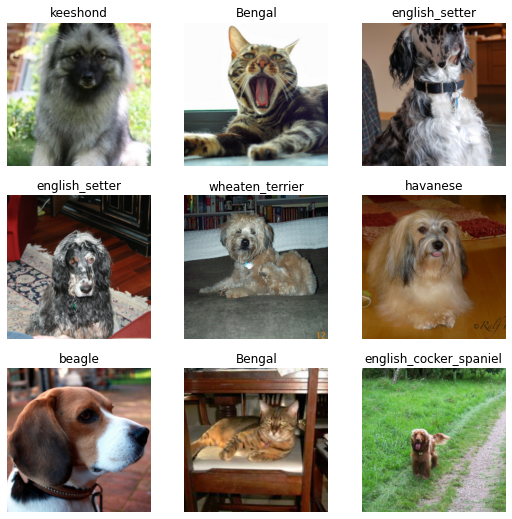

In [ ]:
dls.valid.show_batch()

with `dls.show_batch` we can see some random images from the dataloader,<br> 
`max_n` is the maximum number of images to be shown. <br>
we can pass `figsize` and other `matplotlib` arrgiuments as `*arg` and `**kwarg` too.

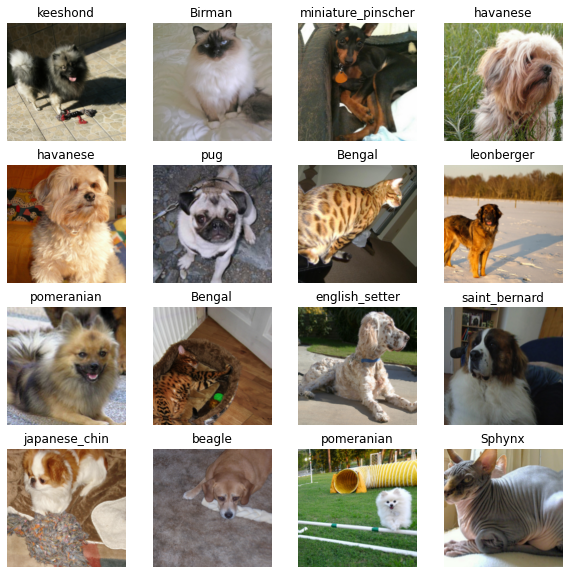

In [ ]:
dls.show_batch(max_n=16, figsize=(10,10))

---
# Metrics

[link to FastAI Doc](https://docs.fast.ai/metrics.html)

## <font color=green>Single-label classification</font>

* **accuracy(inp, targ, axis)** 
<br><br>
* **error_rate(inp,targ,axis)** : `1 - accuracy`
<br><br>
* **top_k_accuracy(inp, targ, k, axis)** : Computes the Top-k accuracy (targ is in the top k predictions of inp)
<br><br>
* **APScoreBinary`(class)`** : Average Precision for single-label binary classification problems. ${AP} = \sum_n (R_n - R_{n-1}) P_n$
<br><br>
* **BalancedAccuracy`(class)`** : Balanced Accuracy for single-label binary classification problems $\texttt{balanced-accuracy} = \frac{1}{2}\left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP}\right )$
<br><br>
* **BrierScore(`(class)`** : Brier score for single-label classification problems. $BS = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1}(y_i - p_i)^2$
<br><br>
* **CohenKappa`(class)`** : Cohen kappa for single-label classification problems. $\kappa = (p_o - p_e) / (1 - p_e)$
<br><br>
* **F1Score`(class)`** : F1 score for single-label classification problems. `F1 = 2 * (precision * recall) / (precision + recall)`
<br><br>
* **FBeta`(class)`** : FBeta score with beta for single-label classification problems. $F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}.$
<br><br>
* **HammingLoss`(class)`**: Hamming loss for single-label classification problems. $L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j)$
<br><br>
* **Jaccard`(class)`** : Jaccard score for single-label classification problems
$ J(y_i, \hat{y}_i) = \frac{|y_i \cap \hat{y}_i|}{|y_i \cup \hat{y}_i|}.$
<br><br>
* **Precision`(class)`** : Precision for single-label classification problems
<br><br>
* **Recall`(class)`** : Recall for single-label classification problems
<br><br>
* **RocAuc`(class)`** : Area Under the Receiver Operating Characteristic Curve for single-label multiclass classification problems
<br><br>
* **RocAucBinary`(class)`** : Area Under the Receiver Operating Characteristic Curve for single-label binary classification problems
<br><br>
* **MatthewsCorrCoef`(class)`** : Matthews correlation coefficient for single-label classification problems. $MCC = \frac{tp \times tn - fp \times fn}{\sqrt{(tp + fp)(tp + fn)(tn + fp)(tn + fn)}}.$


<font color=red>-----------------------------------------------------------------------</font>
## <font color=green>Multi-label classification</font>
* **accuracy_multi(inp, targ, axis)** 
<br><br>

* **APScoreMulti`(class)`** : Average Precision for multi-label classification problems. ${AP} = \sum_n (R_n - R_{n-1}) P_n$
<br><br>

* **BrierScoreMulti(`(class)`** :Brier score for multi-label classification problems. $BS = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}} - 1}(y_i - p_i)^2$
<br><br>

* **F1ScoreMulti`(class)`** : F1 score for multi-label classification problems
<br><br>

* **FBetaMulti`(class)`** : FBeta score with beta for multi-label classification problems. $F_\beta = (1 + \beta^2) \frac{\text{precision} \times \text{recall}}{\beta^2 \text{precision} + \text{recall}}.$
<br><br>
* **HammingLossMulti`(class)`**: Hamming loss for multi-label classification problems. $L_{Hamming}(y, \hat{y}) = \frac{1}{n_\text{labels}} \sum_{j=0}^{n_\text{labels} - 1} 1(\hat{y}_j \not= y_j)$
<br><br>
* **JaccardMulti`(class)`**: Jaccard score for multi-label classification problems. $J(y_i, \hat{y}_i) = \frac{|y_i \cap \hat{y}_i|}{|y_i \cup \hat{y}_i|}$
<br><br>
* **PrecisionMulti`(class)`** : Precision for multi-label classification problems
<br><br>
* **RecallMulti`(class)`** : Recall for multi-label classification problems
<br><br>
* **RocAucMulti`(class)`** : Area Under the Receiver Operating Characteristic Curve for multi-label multiclass classification problems
<br><br>
* **MatthewsCorrCoefMulti`(class)`** :Matthews correlation coefficient for multi-label classification problems. $MCC = \frac{
    c \times s - \sum_{k}^{K} p_k \times t_k
}{\sqrt{
    (s^2 - \sum_{k}^{K} p_k^2) \times
    (s^2 - \sum_{k}^{K} t_k^2)
}}$

<font color=red>-----------------------------------------------------------------------</font>
## <font color=green> Regression</font>


* **mse(inp, targ)** : Mean squared error between inp and targ.
$MSE = \frac{1}{n} \sum_{1}^{n}(Y_i - \hat{Y_i})^2$ 
<br><br>
* **rmse(preds, targs)** : Root mean squared error.
$RSME = \sqrt{ \frac{\sum_{1}^{n}(Y_i - \hat{Y_i})^2}{n} }$
<br><br>
* **mae(inp, targ** : Mean absolute error between inp and targ.
$MAE = \frac{1}{n} \sum_{1}^{n} \vert Y_i - \hat{Y_i} \vert$
<br><br>
* **msle(inp, targ)** : Mean squared logarithmic error between inp and targ.
$MSLE = \frac{1}{N} \sum_{i=0}^{N}( \log(Y_i + 1) - \log(\hat{Y_i} + 1))^2$
<br><br>
* **exp_rmspe(preds, targs)** : Root mean square percentage error of the exponential of predictions and targets.
$RSME = \sqrt{ \frac{\sum_{1}^{n}(e^{Y_i} - e^{\hat{Y_i}})^2}{n} }$
<br><br>
* **ExplainedVariance`(class)`**: Explained variance between predictions and targets.
<br><br>
* **R2Score`(class)`**: R2 score between predictions and targets.
$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
<br><br>
* **PearsonCorrCoef`(class)`**: Pearson correlation coefficient for regression problem.
<br><br>
* **SpearmanCorrCoef`(class)`**: Spearman correlation coefficient for regression problem.

<font color=red>-----------------------------------------------------------------------</font>

## <font color=green>Segmentation</font>

* **foreground_acc(inp, targ, bkg_idx, axis1)** : Computes non-background accuracy for multiclass segmentation
<br><br>
* **Dice`(class)`** : Dice coefficient metric for binary target in segmentation.
<br><br>
* **DiceMulti`(class)`** : Averaged Dice metric (Macro F1) for multiclass target in segmentation.
<br><br>
* **JaccardCoeff`(class)`** : Implementation of the Jaccard coefficient that is lighter in RAM.



<font color=red>-----------------------------------------------------------------------</font>

## <font color=green>NLP</font>

* **CorpusBLEUMetric`(class)`** : Blueprint for defining a metric

* **Perplexity`(class)`** : Perplexity (exponential of cross-entropy loss) for Language Models

* **LossMetric`(class)`** : Create a metric from loss_func.attr named nm


In [ ]:
import torch as T

In [ ]:
a = T.rand((10,1))
b = T.rand((10,1))
print("a:\n",a ,"\nb:\n",b)

#functions
print("mse : ", mse(a,b))
print("rmse : ", rmse(a,b))
print("mae : ", mae(a,b))
print("msle : ", msle(a,b))
print("exp_rmspe : ", exp_rmspe(a,b))

#classes
expVar = ExplainedVariance()
print("expVar : ", expVar(a,b))

expVar = ExplainedVariance()
print("expVar : ", expVar(a,b))

R2 = R2Score()
print("R2 : ", R2(a,b))

PCC = PearsonCorrCoef()
print("PCC : ", PCC(a,b))

SCC = SpearmanCorrCoef()
print("SCC : ", SCC(a,b))

a:
 tensor([[0.1969],
        [0.0198],
        [0.5121],
        [0.6022],
        [0.0159],
        [0.5946],
        [0.6839],
        [0.0507],
        [0.7577],
        [0.3205]]) 
b:
 tensor([[0.9335],
        [0.9405],
        [0.1760],
        [0.1771],
        [0.5146],
        [0.2460],
        [0.4754],
        [0.4652],
        [0.1573],
        [0.5420]])
mse :  TensorBase(0.2679)
rmse :  TensorBase(0.5176)
mae :  TensorBase(0.4711)
msle :  TensorBase(0.1349)
exp_rmspe :  TensorBase(0.4783)
expVar :  -2.4107649326324463
expVar :  -2.4107649326324463
R2 :  -2.5107133449040293
PCC :  -0.7138892750453565
SCC :  -0.6848484848484848


In [ ]:
a = T.randint(low=0, high=2, size=(10,1), dtype = T.bool)
b = T.randint(low=0, high=2, size=(10,1), dtype=T.bool)
 
print("a: ",a)
print("b: ",b)

#functions
print("accuracy: ",accuracy(a,b))

print("error_rate: ", error_rate(a,b))

#classes
P = Precision()
print("Precision: ",P(a,b))

R = Recall()
print("Recall: ",R(a,b))

f1 =F1Score()
print("F1Score: ",f1(a,b))

FB = FBeta(beta = 0.5)
print("FBeta: ",FB(a,b))

HL = HammingLoss()
print("HammingLoss: ",HL(a,b))

Jc = Jaccard()
print("Jaccard: ",Jc(a,b))

a:  tensor([[False],
        [ True],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
b:  tensor([[False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
accuracy:  TensorBase(0.5000)
error_rate:  TensorBase(0.5000)
Precision:  0.8
Recall:  0.8
F1Score:  0.8000000000000002
FBeta:  0.8
HammingLoss:  0.2
Jaccard:  0.6666666666666666


you can use skm_to fastai function to convert sklearn metric functions to fastai functions

In [ ]:
from sklearn.metrics import f1_score

fastai_fi = skm_to_fastai(f1_score)

a = T.randint(low=0, high=2, size=(10,1), dtype = T.bool)
b = T.randint(low=0, high=2, size=(10,1), dtype=T.bool)

fastai_fi(a,b)

0.4444444444444445

---
# Learner
[FastAI Doc](https://docs.fast.ai/learner.html)
## Vision
[FastAI vision learner Doc](https://docs.fast.ai/vision.learner.html#cnn_learner)
* **cnn_learner** : Build a convnet style learner from `dls` and `arch`.[[fast]](https://docs.fast.ai/vision.learner.html#cnn_learner) [[source]](https://github.com/fastai/fastai/blob/master/fastai/vision/learner.py#L160)
>`cnn_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, n_in=3, init=kaiming_normal_, custom_head=None, concat_pool=True, lin_ftrs=None, ps=0.5, first_bn=True, bn_final=False, lin_first=False, y_range=None)` 

    The model is built from `arch` using the number of final activations inferred from `dls` if possible (otherwise pass a value to `n_out`). It might be `pretrained` and the architecture is cut and split using the default metadata of the model architecture (this can be customized by passing a `cut` or a `splitter`).

    If `normalize` and `pretrained` are True, this function adds a Normalization transform to the dls (if there is not already one) using the statistics of the `pretrained` model. That way, you won't ever forget to normalize your data in transfer learning.


* **unet_learner** : Build a unet learner from `dls` and `arch`
>unet_learner(dls, arch, normalize=True, n_out=None, pretrained=True, config=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, n_in=3, blur=False, blur_final=True, self_attention=False, y_range=None, last_cross=True, bottle=False, act_cls=ReLU, init=kaiming_normal_, norm_type=None)

    The model is built from `arch` using the number of final filters inferred from `dls` if possible (otherwise pass a value to n_out). It might be `pretrained` and the architecture is `cut` and split using the default metadata of the model architecture (this can be customized by passing a cut or a splitter).

    If `normalize` and `pretrained` are True, this function adds a Normalization transform to the dls (if there is not already one) using the statistics of the pretrained model. That way, you won't ever forget to normalize your data in transfer learning.


<font color=red>-----------------------------------------------------------------------</font>
## Text
[FastAI Doc](https://docs.fast.ai/text.learner.html)
*  **TextLearner** : Basic class for a Learner in NLP.[doc](https://docs.fast.ai/text.learner.html#TextLearner)
> `TextLearner(dls, model, alpha=2.0, beta=1.0, moms=(0.8, 0.7, 0.8), loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True) :: Learner`


* **LMLearner** :Add functionality to TextLearner when dealing with a language model, Return text and the n_words that come after.[doc](https://docs.fast.ai/text.learner.html#LMLearner)
>`LMLearner(dls, model, alpha=2.0, beta=1.0, moms=(0.8, 0.7, 0.8), loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True) :: TextLearner`


* **text_classifier_learner** : Create a Learner with a text classifier from dls and arch.[doc](https://docs.fast.ai/text.learner.html#text_classifier_learner)
.`text_classifier_learner(dls, arch, seq_len=72, config=None, backwards=False, pretrained=True, drop_mult=0.5, n_out=None, lin_ftrs=None, ps=None, max_len=1440, y_range=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))`


<font color=red>-----------------------------------------------------------------------</font>

## Tabular 
[FastAI Doc](https://docs.fast.ai/tabular.learner.html)
* **TabularLearner** : Get a Learner using dls, with metrics, including a TabularModel created using the remaining params.[doc](https://docs.fast.ai/tabular.learner.html#tabular_learner)
>`tabular_learner(dls, layers=None, emb_szs=None, config=None, n_out=None, y_range=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))`

<font color=red>-----------------------------------------------------------------------</font>

## GAN
[FastAI Doc](https://docs.fast.ai/vision.gan.html#GANLearner)
* **GANLearner** : A Learner suitable for GANs.[doc](https://docs.fast.ai/vision.gan.html#GAN-Learner)
>`GANLearner(dls, generator, critic, gen_loss_func, crit_loss_func, switcher=None, gen_first=False, switch_eval=True, show_img=True, clip=None, cbs=None, metrics=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95)) :: Learner`


<font color=red>-----------------------------------------------------------------------</font>
## collab
[FastAI Doc](https://docs.fast.ai/collab.html#collab_learner)
* **collab_learner** : Create a Learner for collaborative filtering on dls.[doc](https://docs.fast.ai/collab.html#Create-a-Learner)
>`collab_learner(dls, n_factors=50, use_nn=False, emb_szs=None, layers=None, config=None, y_range=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))`


---
## <font color=green>loss functions</font>

* **CrossEntropyLossFlat** : This criterion combines LogSoftmax and NLLLoss in one single class. [[fastai]](https://docs.fast.ai/losses.html#CrossEntropyLossFlat) [[pytorch]](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) $Cross Entropy Loss(x, class) = -\log (\frac{exp(x[class]}{\sum_j exp(x[j]})$
<br> reduction types :`none` | `mean` | `sum`.
<br><br>
* **FocalLossFlat** :Same as CrossEntropyLossFlat but with focal paramter, gamma.[[fastia]](https://docs.fast.ai/losses.html#FocalLossFlat)
$Focal Loss = -(1 - \frac{exp(x[class]}{\sum_j exp(x[j]})^\gamma \times \log(\frac{exp(x[class]}{\sum_j exp(x[j]}), \gamma > 0$
<br><br>
* **BCELossFlat**: Creates a criterion that measures the Binary Cross Entropy between the target and the output.[[fastia]](https://docs.fast.ai/losses.html#BCELossFlat) [[pytorch]](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) $L_n =-w_n[y_n . \log(x_n) + (1 - y_n).\log(1 - (x_n))] $
<br><br>
* **BCEWithLogitsLossFlat**: This loss combines a `Sigmoid` layer and the `BCELoss` in one single class.[[fastia]](https://docs.fast.ai/losses.html#BCEWithLogitsLossFlat) [[pytorch]](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html)
$L_n =-w_n[y_n . \log \sigma(x_n) + (1 - y_n).\log(1 - \sigma(x_n))] $
<br><br>
* **MSELossFlat** : Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y .[[fastia]](https://docs.fast.ai/losses.html#MSELossFlat) [[pytorch]](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) $L_n = (x_n - y_n) ^ 2$
<br><br>
* **L1LossFlat** : Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y.[[fastia]](https://docs.fast.ai/losses.html#L1LossFlat) [[pytorch]](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) $L_n = \vert x_n - y_n \vert$

---
## Optimizers

* **`SGD(params, lr, mom=0.0, wd=0.0, decouple_wd=True)`**: A Optimizer for SGD with `lr` and `mom` and `params`.<br>
Optional weight decay of wd is applied, as true weight decay (decay the weights directly) if `decouple_wd=True` else as L2 regularization (add the decay to the gradients).
>$w_{t+1} = w_t - \alpha .m_t $
<br>$m_t = \beta .m_{t-1} + (1 - \beta).\frac{\partial L}{\partial w_t}$
<br>
* **`RMSProp(params, lr, sqr_mom=0.99, mom=0.0, wd=0.0, decouple_wd=True)`** : 
>$w_{t+1} = w_t - \frac{\alpha}{\sqrt{v_t + \epsilon}}.\frac{\partial L}{\partial w_t}$<br>
$v_t = \beta.v_{t-1} + (1 - \beta).[\frac{\partial L}{\partial w_t}]^2$
<br>
* **`Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)`**:
> $w_{t+1} = w_t - \frac{\alpha}{\sqrt{\hat{v_t}} + \epsilon}.\hat{m_t}$<br>
$m_t = \beta_1 . m_{t-1} + (1- \beta_1).\frac{\partial L}{\partial w_t}$<br>
$v_t = \beta_2 . v_{t-1} + (1- \beta_2).[\frac{\partial L}{\partial w_t}]^2$<br>
<br>
* **`RAdam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.0, beta=0.0, decouple_wd=True)`**: RAdam is the rectifier version of Adam proposed by Liu, **Jian, He et al** that provides an dynamic adjustment to the adaptive learning rate based on their detailed study into the effects of variance and momentum during training.
<br>
* **`QHAdam(params, lr, mom=0.999, sqr_mom=0.999, nu_1=0.7, nu_2=1.0, eps=1e-08, wd=0.0, decouple_wd=True)`** : QHAdam is a QH augmented version of Adam, where we replace both of Adam's moment estimators with quasi-hyperbolic terms. QHAdam decouples the momentum term from the current gradient when updating the weights, and decouples the mean squared gradients term from the current squared gradient when updating the weights.
<br>
* **`Larc(params, lr, mom=0.9, clip=True, trust_coeff=0.02, eps=1e-08, wd=0.0, decouple_wd=True)`**:  the layer-wise learning rate λ is the global learning rate η times the ratio of the norm of the layer weights to the norm of the layer gradients. 
>$\lambda^l = \frac{||w^l||}{\nabla L(w^l)}$
<br>
* **`Lamb(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.0, decouple_wd=True)`**: Layer-wise Adaptive Moments optimizer for Batch training
> $r_1 = ||w^l_{t-1}||_2$<br>
$r_2 = ||\frac{m_t^l}{\sqrt{v_t^l+\epsilon}}+\lambda.w_{t-1}^l||_2$<br>
$r=\frac{r_1}{r_2}$<br>
$\eta^l = r \times \eta$<br>
$w_t^l = w_{t-1}^l - \eta^l . (\frac{m_t^l}{\sqrt{v_t^l+\epsilon}}+ \lambda.w_{t-1}^l)$

## make a Learner

In [ ]:
learner = cnn_learner(dls, #DataLoader
                      resnet34,  #model
                      metrics=[error_rate,accuracy],
                      cbs=ShowGraphCallback(), # adding a CallBack
                      )

In [ ]:
learner.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 115 x 115 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                      

<font color=red>-----------------------------------------------------------------------</font>

## <font color=green>Learner CallBacks</font>
[FastAI Doc](https://docs.fast.ai/callback.tracker.html)

* **`ShortEpochCallback(pct, short_valid)`** :Fit just pct of an epoch, then stop
<br><br>
* **`GradientAccumulation(n_acc)`** : Accumulate gradients before updating weights.
When the number of steps per accumulation is higher than the number of batches, the parameters (and therefore validation loss) don't change at all
<br><br>
* **`GradientClip(max_norm, norm_type)`**: Clip norm of gradients.
<br><br>
* **`TerminateOnNaNCallback`**: A Callback that terminates training if loss is NaN.,<font color=red>adding this breaks thr Interpretation. </font>[doc](https://docs.fast.ai/callback.tracker.html#TerminateOnNaNCallback)
<br><br>
* **`TrackerCallback(monitor,comp, min_delta, reset_on_fit)`**: A Callback that keeps track of the best value in monitor.[doc](https://docs.fast.ai/callback.tracker.html#TrackerCallback)
<br><br>
* **`EarlyStoppingCallback(monitor=, comp, min_delta, patience, reset_on_fit)`**:
A TrackerCallback that terminates training when monitored quantity stops improving.[doc](https://docs.fast.ai/callback.tracker.html#EarlyStoppingCallback)
<br><br>
* **`SaveModelCallback(monitor, comp, min_delta, fname, every_epoch, at_end, with_opt, reset_on_fit)`**: A TrackerCallback that saves the model's best during training and loads it at the end.[doc](https://docs.fast.ai/callback.tracker.html#SaveModelCallback)
> `at_end`: if true saves model just after fiting.<br>
> `evey_epoch`: if True it will save model after every epoch, if True it won't load the best model,<br>
>  `if comp is None: comp = np.less if 'loss' in monitor or 'error' in monitor else np.greater`
<br><br>
* **`ReduceLROnPlateau(monitor, comp, min_delta, patience, factor, min_lr, reset_on_fit`**: A TrackerCallback that reduces learning rate when a metric has stopped improving.[doc](https://docs.fast.ai/callback.tracker.html#ReduceLROnPlateau)
<br><br>
* **`ShowGraphCallback`** : Update a graph of training and validation loss.
<br><br>
* **`CSVLogger(fname, append)`** : Log the results displayed in learn.path/fname. The results are appended to an existing file if append, or they overwrite it otherwise.

* **`ParamScheduler(scheds)`**: Schedule hyper-parameters according to scheds.[doc](https://docs.fast.ai/callback.schedule.html#SchedLin)
> * `SchedLin`
>* `SchedCos`
>* `SchedNo`
>* `SchedExp`
>* `SchedPoly`
><br><br>example :
```
sched = {'lr': SchedLin(1e-3, 1e-2)}
learn.fit(1, cbs=ParamScheduler(sched))
```




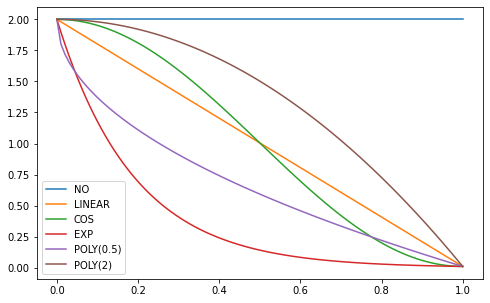

In [ ]:
annealings = "NO LINEAR COS EXP".split()
p = torch.linspace(0.,1,100)
fns = [SchedNo, SchedLin, SchedCos, SchedExp]

plt.figure(figsize=(8,5))
for fn, t in zip(fns, annealings):
    plt.plot(p, [fn(2, 1e-2)(o) for o in p], label=t)

f = SchedPoly(2,1e-2,0.5)
plt.plot(p, [f(o) for o in p], label="POLY(0.5)")
plt.legend();

f = SchedPoly(2,1e-2,2)
plt.plot(p, [f(o) for o in p], label="POLY(2)")
plt.legend();

In [ ]:
TermOnNan = TerminateOnNaNCallback()

redlr = ReduceLROnPlateau(monitor='valid_loss',
                          comp= None,   #operator ==> monitor (comp) min_delta
                          patience=1,      # number of epochs to wait to take action,
                          factor = 10.0,   # new_lr = old_lr / factor,
                          min_lr = 0)

SMC = SaveModelCallback(every_epoch=False, at_end=False,with_opt=True)

learner.add_cbs([redlr,
                 #TermOnNan,
                 SMC])

print(learner.cbs)

[TrainEvalCallback, Recorder, ProgressCallback, ShowGraphCallback, ReduceLROnPlateau, SaveModelCallback]


In [ ]:
learner.show_training_loop()


Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback, ShowGraphCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, Progress

In [ ]:
import torch as T

T.cuda.empty_cache()

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.005248074419796467)

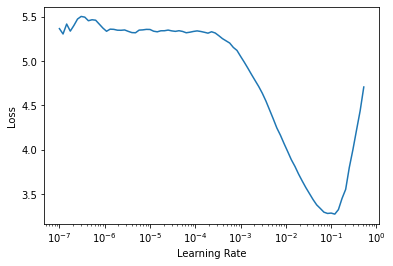

In [ ]:
learner.lr_find()

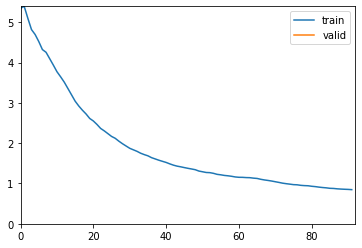

In [ ]:
learner.fine_tune(epochs = 1,            # number of epochs for training all unfreezed layers
                  base_lr = 0.0052,
                  freeze_epochs = 0,     # count of epochs for training freezed layers
)

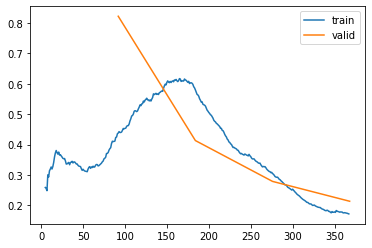

In [ ]:
learner.recorder.plot_loss()

## Save model
[[doc]](https://docs.fast.ai/learner.html#Serializing)
* **`Learner.save(file, with_opt=True, pickle_protocol=2)`** : Save model and <font color=orange>optimizer state</font> (if with_opt) to self.path/self.model_dir/file
file can be a Path, a string or a buffer. pickle_protocol is passed along to torch.save.
* **`Learner.export(fname='export.pkl', pickle_module=pickle, pickle_protocol=2)`**: Export the content of self <font color=orange>the optimizer, loss function, metrics and ..</font> just the model!

* **`Learner.load(file, device=None, with_opt=True, strict=True)`**: Load model and optimizer state (if with_opt) from self.path/self.model_dir/file using device.

## Show results

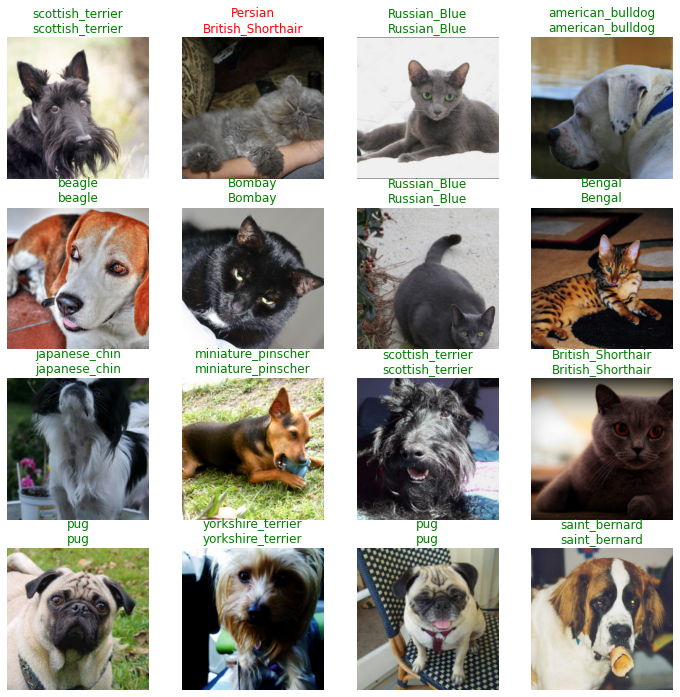

In [ ]:
learner.show_results(max_n = 16, figsize=(12,12)) 

---
# Interpetation

* **`Interpetation(dl, inputs, preds, targs, decoded, losses)`** : Interpretation base class, can be inherited for task specific Interpretation classes

* **`ClassificationInterpretation(dl, inputs, preds, targs, decoded, losses)`**: Interpretation methods for classification models.

* **`SegmentationInterpretation(dl, inputs, preds, targs, decoded, losses)`** : Interpretation methods for segmentation models.

In [ ]:
inter = Interpretation.from_learner(learner)

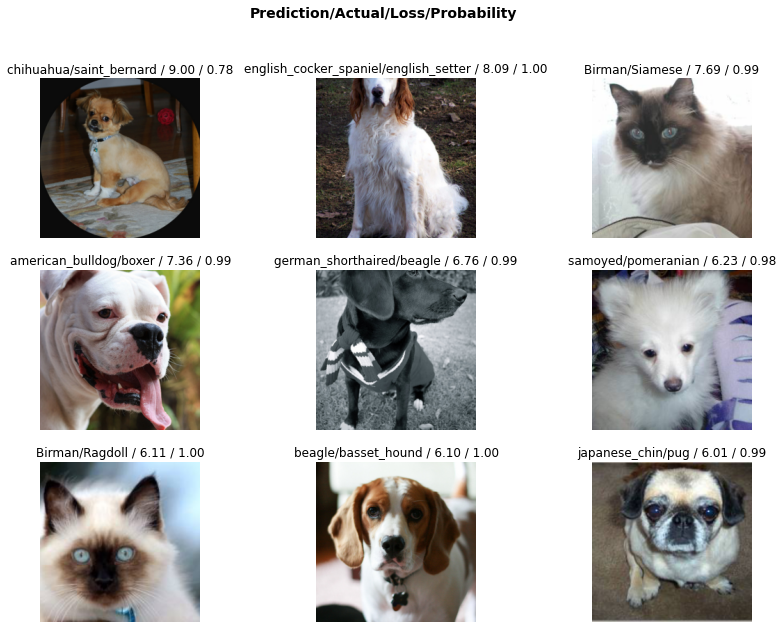

In [ ]:
 inter.plot_top_losses(9,figsize=(14,10))

In [ ]:
classinter = ClassificationInterpretation.from_learner(learner)

### Cmaps
<table border="2" class="dataframe">
  <font color=blue>
  <thead >
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
      <th>3</th>
      <th>4</th>
      <th>5</th>
      <th>6</th>
      <th>7</th>
      <th>8</th>
      <th>9</th>
    </tr>
  </thead>
 </font>
  <tbody>
    <tr>
      <th>0</th>
      <td>Accent</td>
      <td>Accent_r</td>
      <td>Blues</td>
      <td>Blues_r</td>
      <td>BrBG</td>
      <td>BrBG_r</td>
      <td>BuGn</td>
      <td>BuGn_r</td>
      <td>BuPu</td>
      <td>BuPu_r</td>
    </tr>
    <tr>
      <th>1</th>
      <td>CMRmap</td>
      <td>CMRmap_r</td>
      <td>Dark2</td>
      <td>Dark2_r</td>
      <td>GnBu</td>
      <td>GnBu_r</td>
      <td>Greens</td>
      <td>Greens_r</td>
      <td>Greys</td>
      <td>Greys_r</td>
    </tr>
    <tr>
      <th>2</th>
      <td>OrRd</td>
      <td>OrRd_r</td>
      <td>Oranges</td>
      <td>Oranges_r</td>
      <td>PRGn</td>
      <td>PRGn_r</td>
      <td>Paired</td>
      <td>Paired_r</td>
      <td>Pastel1</td>
      <td>Pastel1_r</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Pastel2</td>
      <td>Pastel2_r</td>
      <td>PiYG</td>
      <td>PiYG_r</td>
      <td>PuBu</td>
      <td>PuBuGn</td>
      <td>PuBuGn_r</td>
      <td>PuBu_r</td>
      <td>PuOr</td>
      <td>PuOr_r</td>
    </tr>
    <tr>
      <th>4</th>
      <td>PuRd</td>
      <td>PuRd_r</td>
      <td>Purples</td>
      <td>Purples_r</td>
      <td>RdBu</td>
      <td>RdBu_r</td>
      <td>RdGy</td>
      <td>RdGy_r</td>
      <td>RdPu</td>
      <td>RdPu_r</td>
    </tr>
    <tr>
      <th>5</th>
      <td>RdYlBu</td>
      <td>RdYlBu_r</td>
      <td>RdYlGn</td>
      <td>RdYlGn_r</td>
      <td>Reds</td>
      <td>Reds_r</td>
      <td>Set1</td>
      <td>Set1_r</td>
      <td>Set2</td>
      <td>Set2_r</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Set3</td>
      <td>Set3_r</td>
      <td>Spectral</td>
      <td>Spectral_r</td>
      <td>Wistia</td>
      <td>Wistia_r</td>
      <td>YlGn</td>
      <td>YlGnBu</td>
      <td>YlGnBu_r</td>
      <td>YlGn_r</td>
    </tr>
    <tr>
      <th>7</th>
      <td>YlOrBr</td>
      <td>YlOrBr_r</td>
      <td>YlOrRd</td>
      <td>YlOrRd_r</td>
      <td>afmhot</td>
      <td>afmhot_r</td>
      <td>autumn</td>
      <td>autumn_r</td>
      <td>binary</td>
      <td>binary_r</td>
    </tr>
    <tr>
      <th>8</th>
      <td>bone</td>
      <td>bone_r</td>
      <td>brg</td>
      <td>brg_r</td>
      <td>bwr</td>
      <td>bwr_r</td>
      <td>cividis</td>
      <td>cividis_r</td>
      <td>cool</td>
      <td>cool_r</td>
    </tr>
    <tr>
      <th>9</th>
      <td>coolwarm</td>
      <td>coolwarm_r</td>
      <td>copper</td>
      <td>copper_r</td>
      <td>cubehelix</td>
      <td>cubehelix_r</td>
      <td>flag</td>
      <td>flag_r</td>
      <td>gist_earth</td>
      <td>gist_earth_r</td>
    </tr>
    <tr>
      <th>10</th>
      <td>gist_gray</td>
      <td>gist_gray_r</td>
      <td>gist_heat</td>
      <td>gist_heat_r</td>
      <td>gist_ncar</td>
      <td>gist_ncar_r</td>
      <td>gist_rainbow</td>
      <td>gist_rainbow_r</td>
      <td>gist_stern</td>
      <td>gist_stern_r</td>
    </tr>
    <tr>
      <th>11</th>
      <td>gist_yarg</td>
      <td>gist_yarg_r</td>
      <td>gnuplot</td>
      <td>gnuplot2</td>
      <td>gnuplot2_r</td>
      <td>gnuplot_r</td>
      <td>gray</td>
      <td>gray_r</td>
      <td>hot</td>
      <td>hot_r</td>
    </tr>
    <tr>
      <th>12</th>
      <td>hsv</td>
      <td>hsv_r</td>
      <td>inferno</td>
      <td>inferno_r</td>
      <td>jet</td>
      <td>jet_r</td>
      <td>magma</td>
      <td>magma_r</td>
      <td>nipy_spectral</td>
      <td>nipy_spectral_r</td>
    </tr>
  </tbody>
</table>

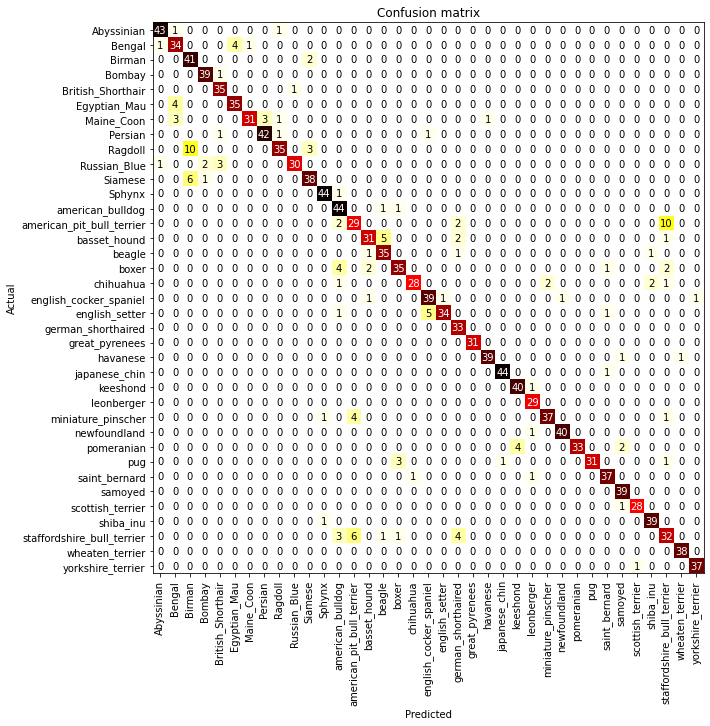

In [ ]:
classinter.plot_confusion_matrix(figsize=(14,10),cmap='hot_r')

In [ ]:
classinter.most_confused()[:10]

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Siamese', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('basset_hound', 'beagle', 5),
 ('english_setter', 'english_cocker_spaniel', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('boxer', 'american_bulldog', 4),
 ('miniature_pinscher', 'american_pit_bull_terrier', 4)]

In [ ]:
classinter.print_classification_report()

                            precision    recall  f1-score   support

                Abyssinian       0.96      0.96      0.96        45
                    Bengal       0.81      0.85      0.83        40
                    Birman       0.72      0.95      0.82        43
                    Bombay       0.93      0.97      0.95        40
         British_Shorthair       0.88      0.97      0.92        36
              Egyptian_Mau       0.90      0.90      0.90        39
                Maine_Coon       0.97      0.79      0.87        39
                   Persian       0.93      0.93      0.93        45
                   Ragdoll       0.92      0.73      0.81        48
              Russian_Blue       0.97      0.83      0.90        36
                   Siamese       0.88      0.84      0.86        45
                    Sphynx       0.96      0.98      0.97        45
          american_bulldog       0.79      0.96      0.86        46
 american_pit_bull_terrier       0.74      0.67

<font color=red>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color=orange>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color=yellow>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>


<font color=lime>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>


<font color=green>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color=blue>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color=purple>
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# Examples

## Collab

### Upgrading FastAI

In [ ]:
!pip install --upgrade fastai

### Importing needed Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from fastai.collab import *
from fastai.tabular.all import *

### downlaoding dataset

In [ ]:
path = untar_data(URLs.ML_100k,None,None)

print(path)
print(path.ls())

In [ ]:
%less /root/.fastai/data/ml-100k/README

In [ ]:
rating = pd.read_csv(path/"u.data",delimiter="\t",header=None,usecols=(0,1,2),names=("user","movie",'rating'))
rating

In [ ]:
movies = pd.read_csv(path/"u.item",delimiter="|",encoding='latin-1',header=None,usecols=(0,1),names=("movie","movie_name"))
movies

In [ ]:
ratings = rating.merge(movies)
ratings

In [ ]:
print("number of unique users:",ratings["user"].nunique())
print("number of unique movies:",ratings["movie"].nunique())

### making DataLoader

In [ ]:
dls = CollabDataLoaders.from_df(ratings,user_name="user",item_name="movie_name",rating_name="rating",bs=256)

In [ ]:
dls.show_batch()

In [ ]:
x,y = dls.one_batch()
print(x.shape, y.shape)

torch.Size([256, 2]) torch.Size([256, 1])


In [ ]:
dls.classes

{'movie_name': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The

In [ ]:
dls.cat_names

(#2) ['user','movie_name']

A Rule of thumb suggests embeding size is `min(600, round(1.6 * n_cat**0.56))` and n_cat is number of unique items in input.

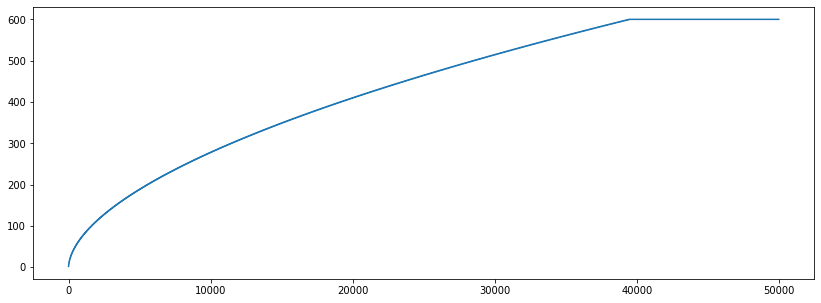

In [ ]:
def emb_sz_rule(n_cat):
    "Rule of thumb to pick embedding size corresponding to `n_cat`"
    return min(600, round(1.6 * n_cat**0.56))

a = np.arange(1,50000,1)
b = []
for i in range(len(a)):
    b.append(emb_sz_rule(a[i]))

plt.figure(figsize=(14,5))
plt.plot(a,b)

In [ ]:
print("number of unique users:",ratings["user"].nunique())
print("number of unique movies:",ratings["movie"].nunique(),"\n")

print(1.6 * (944 ** 0.56) )
print(1.6 * (1665 ** 0.56) )
print("\n",get_emb_sz(dls))

number of unique users: 943
number of unique movies: 1682 

74.14882945533716
101.88540024021452

 [(944, 74), (1665, 102)]


### Learner

two kinds of models:

* **`EmbeddingDotBias(n_factors, n_users, n_items, y_range)`**
<br><br>
* **`EmbeddingNN(emb_szs, layers, ps=None, embed_p=0.0, y_range=None, use_bn=True, bn_final=False, bn_cont=True, act_cls=ReLU(inplace=True), lin_first=True)`**

---



```
collab_learner(dls                       # Dataloader
               n_factors[int],           # number of feature extracted for EmbeddingDotBias Model
               use_nn[bool],             # if True model will be EmbedingNN 
               emb_szs,                  # list of 2 tuples, default uses get_emb_sz(dls)  
               layers[list],             # list of fully connected layes like :[200,100,50] 
               config,                   # tabular_config 
               y_range,                  # tuple (y_min,y_max)
               loss_func,
               opt_func,
               lr=0.001,
               splitter,
               cbs,                      # list of CallBacks
               metrics,                  # list of Metrics
               path,
               model_dir='models',
               wd,                       # weigth Decay factor
               wd_bn_bias=False,         # weight Decay for BatchNorm layer
               train_bn=True,            # if True BatchNorm parameters will be trained
               moms=(0.95, 0.85, 0.95)   # Optimizers momentoms
               )
```
**tabular_config**
```
tabular_config(ps[list],                        #list of DropOut proportions line [0.5, 0.4, 0.3]
               embed_p=0.0,                     # DropOut proportions for embeding layers
               y_range,
               use_bn[bool],                    # uses BatchNorm layer if True
               bn_final[bool],                  # uses BatchNorm layer for last layer if True
               bn_cont[bool],  
               act_cls=ReLU(inplace=True),      # Activation layer Type
               lin_first=True
               )  -> dict
```




#### Learner1(EmbeddingDotBias)

In [ ]:
learner1 = collab_learner(dls,
                          n_factors=100,
                          y_range=(0,6),
                          metrics = [mse,mae,msle,exp_rmspe],
)
grp = ShowGraphCallback
rlp = ReduceLROnPlateau(factor=20)
svm = SaveModelCallback(at_end=False,every_epoch=False,reset_on_fit=False)
esc = EarlyStoppingCallback(patience=10)
learner1.add_cbs([grp,svm,esc])
                 
print(learner1.model)

learner1.show_training_loop()

EmbeddingDotBias(
  (u_weight): Embedding(944, 100)
  (i_weight): Embedding(1665, 100)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)
Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback, SaveModelCallback, EarlyStoppingCallback, ShowGraphCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCal

In [ ]:
get_emb_sz(dls)

[(944, 74), (1665, 102)]

#### Learner2(EmbeddingNN)

In [ ]:
learner2 = collab_learner(dls,
                          use_nn=True,
                          emb_szs ={"user":74,"movie_name":102},
                          layers=[200,100],
                          y_range = (0,6),
                          metrics = [mse,mae,msle,exp_rmspe],
                          config = tabular_config(ps = [0.1,0.1],
                                                  embed_p = 0.1,
                                                  use_bn = True,)
                         )

grp = ShowGraphCallback
svm = SaveModelCallback(at_end=False,every_epoch=False,reset_on_fit=False)
esc = EarlyStoppingCallback(patience=10)
learner2.add_cbs([grp,svm,esc])
                 
print(learner2.model)

learner2.show_training_loop()

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(944, 74)
    (1): Embedding(1665, 102)
  )
  (emb_drop): Dropout(p=0.1, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=176, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=1, bias=True)
    )
    (3): SigmoidRange(low=0, high=6)
  )
)
Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback, SaveModelCallback, Ear

#### Learner 1 training

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=2.0892961401841603e-05)

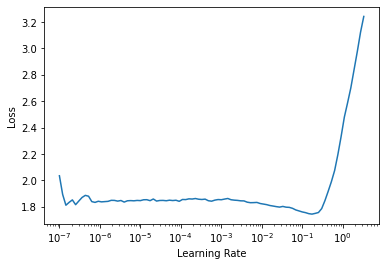

In [ ]:
learner1.lr_find()

Better model found at epoch 0 with valid_loss value: 1.3357038497924805.


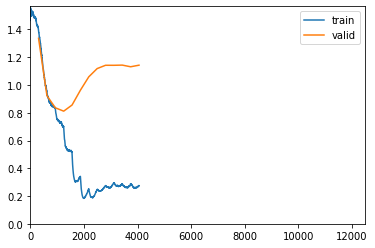

Better model found at epoch 1 with valid_loss value: 0.9230310320854187.
Better model found at epoch 2 with valid_loss value: 0.8358719944953918.
Better model found at epoch 3 with valid_loss value: 0.8113909959793091.
No improvement since epoch 3: early stopping


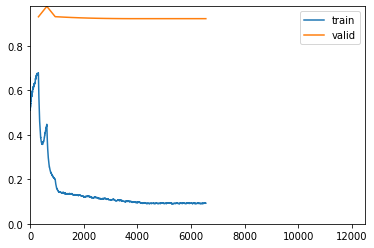

Epoch 1: reducing lr to 0.001
Epoch 2: reducing lr to 0.0001
Epoch 12: reducing lr to 1e-05
Epoch 13: reducing lr to 1.0000000000000002e-06
Epoch 14: reducing lr to 1.0000000000000002e-07
Epoch 15: reducing lr to 1.0000000000000002e-08
Epoch 16: reducing lr to 1.0000000000000003e-09
Epoch 17: reducing lr to 1.0000000000000003e-10
Epoch 18: reducing lr to 1.0000000000000003e-11
Epoch 19: reducing lr to 1.0000000000000002e-12
Epoch 20: reducing lr to 1.0000000000000002e-13
Epoch 21: reducing lr to 1.0000000000000002e-14
No improvement since epoch 11: early stopping


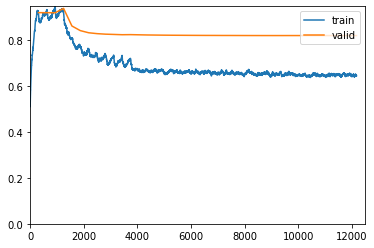

Epoch 3: reducing lr to 0.001
Epoch 11: reducing lr to 0.0001
Epoch 30: reducing lr to 1e-05
Epoch 31: reducing lr to 1.0000000000000002e-06
Epoch 32: reducing lr to 1.0000000000000002e-07
Epoch 33: reducing lr to 1.0000000000000002e-08
Epoch 34: reducing lr to 1.0000000000000003e-09
Epoch 35: reducing lr to 1.0000000000000003e-10
Epoch 36: reducing lr to 1.0000000000000003e-11
Epoch 37: reducing lr to 1.0000000000000002e-12
Epoch 38: reducing lr to 1.0000000000000002e-13
Epoch 39: reducing lr to 1.0000000000000002e-14
No improvement since epoch 29: early stopping


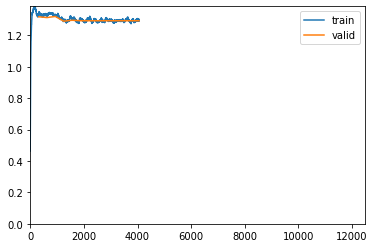

Epoch 2: reducing lr to 0.001
Epoch 4: reducing lr to 0.0001
Epoch 5: reducing lr to 1e-05
Epoch 6: reducing lr to 1.0000000000000002e-06
Epoch 7: reducing lr to 1.0000000000000002e-07
Epoch 8: reducing lr to 1.0000000000000002e-08
Epoch 9: reducing lr to 1.0000000000000003e-09
Epoch 10: reducing lr to 1.0000000000000003e-10
Epoch 11: reducing lr to 1.0000000000000003e-11
Epoch 12: reducing lr to 1.0000000000000002e-12
Epoch 13: reducing lr to 1.0000000000000002e-13
No improvement since epoch 3: early stopping


valid_loss 0.8113909959793091


In [ ]:
learner1.fit_one_cycle(40,0.01)

learner1.fit(40,0.01,cbs=ReduceLROnPlateau(),wd=0.1)
learner1.fit(40,0.01,cbs=ReduceLROnPlateau(),wd=1)
learner1.fit(40,0.01,cbs=ReduceLROnPlateau(),wd=10)

print("valid_loss",learner1.validate()[0])

In [ ]:
learner1.show_results()

In [ ]:
preds, y =learner2.get_preds()
pred_df = pd.DataFrame({'preds':preds,"y":y.view(-1).numpy()})
pred_df['preds'] = pred_df.apply(lambda x: round(x,0),axis=1)
a = pred_df[pred_df["preds"] == pred_df["y"]]
acc = a.count() / pred_df.count()
print('accuracy',acc)

#### Learner 2 trainigs

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=6.309573450380412e-07)

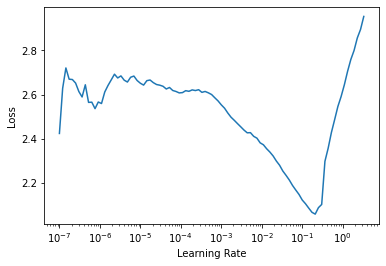

In [ ]:
learner2.lr_find()

Better model found at epoch 0 with valid_loss value: 0.9317792057991028.


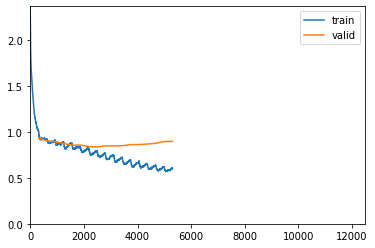

Better model found at epoch 1 with valid_loss value: 0.9040851593017578.
Better model found at epoch 2 with valid_loss value: 0.893807053565979.
Better model found at epoch 3 with valid_loss value: 0.8736773729324341.
Better model found at epoch 4 with valid_loss value: 0.8546344637870789.
Better model found at epoch 6 with valid_loss value: 0.8400730490684509.
Better model found at epoch 7 with valid_loss value: 0.8358879089355469.
No improvement since epoch 7: early stopping


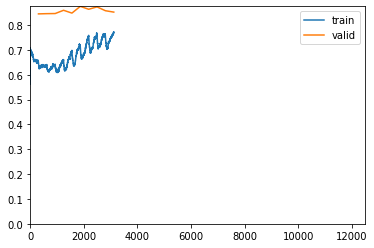

No improvement since epoch 0: early stopping


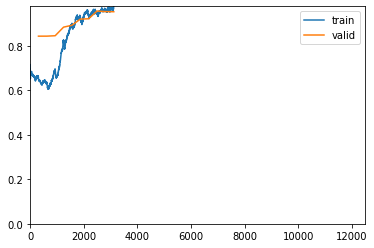

No improvement since epoch 0: early stopping


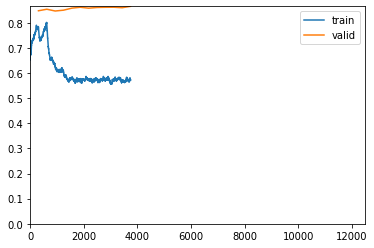

Epoch 1: reducing lr to 0.001
Epoch 3: reducing lr to 0.0001
Epoch 4: reducing lr to 1e-05
Epoch 5: reducing lr to 1.0000000000000002e-06
Epoch 6: reducing lr to 1.0000000000000002e-07
Epoch 7: reducing lr to 1.0000000000000002e-08
Epoch 8: reducing lr to 1e-08
No improvement since epoch 2: early stopping


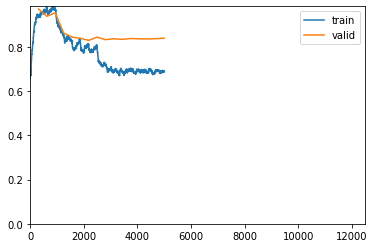

Epoch 2: reducing lr to 0.001
Better model found at epoch 6 with valid_loss value: 0.8293261528015137.
Epoch 7: reducing lr to 0.0001
Epoch 8: reducing lr to 1e-05
Epoch 9: reducing lr to 1.0000000000000002e-06
Epoch 10: reducing lr to 1.0000000000000002e-07
Epoch 11: reducing lr to 1.0000000000000002e-08
Epoch 12: reducing lr to 1e-08
No improvement since epoch 6: early stopping


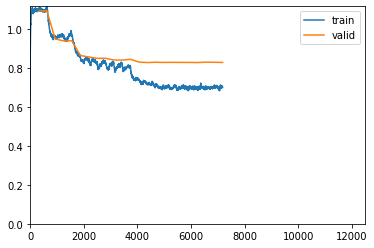

Epoch 1: reducing lr to 0.001
Epoch 4: reducing lr to 0.0001
Epoch 11: reducing lr to 1e-05
Better model found at epoch 13 with valid_loss value: 0.826690137386322.
Epoch 14: reducing lr to 1.0000000000000002e-06
Epoch 15: reducing lr to 1.0000000000000002e-07
Epoch 16: reducing lr to 1.0000000000000002e-08
Epoch 17: reducing lr to 1e-08
No improvement since epoch 13: early stopping


valid_loss 0.826690137386322


In [ ]:
learner2.fit_one_cycle(40,0.01)
learner2.fit_one_cycle(40,0.01,wd=.1)
learner2.fit_one_cycle(40,0.01,wd=1)

learner2.fit(40,0.01,cbs=ReduceLROnPlateau(min_lr=1e-08),wd=0.1)
learner2.fit(40,0.01,cbs=ReduceLROnPlateau(min_lr=1e-08),wd=1)
learner2.fit(40,0.01,cbs=ReduceLROnPlateau(min_lr=1e-08),wd=10)

print("valid_loss",learner2.validate()[0])

In [ ]:
learner2.show_results()

In [ ]:
preds, y =learner2.get_preds()
pred_df = pd.DataFrame({'preds':preds,"y":y.view(-1).numpy()})
pred_df['preds'] = pred_df.apply(lambda x: round(x,0),axis=1)
a = pred_df[pred_df["preds"] == pred_df["y"]]
acc = a.count() / pred_df.count()
print('accuracy',acc)

---

## Tabular

In [ ]:
!pip install --upgrade fastai

     |████████████████████████████████| 204kB 7.6MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastai.tabular.all import *
from fastai import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pld

#### downlaoding dataset

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/adult_sample/models'),Path('/root/.fastai/data/adult_sample/adult.csv'),Path('/root/.fastai/data/adult_sample/export.pkl')]

In [ ]:
df = pd.read_csv(path/"adult.csv")
df.head()

age          workclass  fnlwgt  ... hours-per-week  native-country salary
0   49            Private  101320  ...             40   United-States  >=50k
1   44            Private  236746  ...             45   United-States  >=50k
2   38            Private   96185  ...             32   United-States   <50k
3   38       Self-emp-inc  112847  ...             40   United-States  >=50k
4   42   Self-emp-not-inc   82297  ...             50   United-States   <50k

[5 rows x 15 columns]

### Seaborn plots

[Text(0, 0, ' White'),
 Text(0, 0, ' Black'),
 Text(0, 0, ' Asian-Pac-Islander'),
 Text(0, 0, ' Amer-Indian-Eskimo'),
 Text(0, 0, ' Other')]

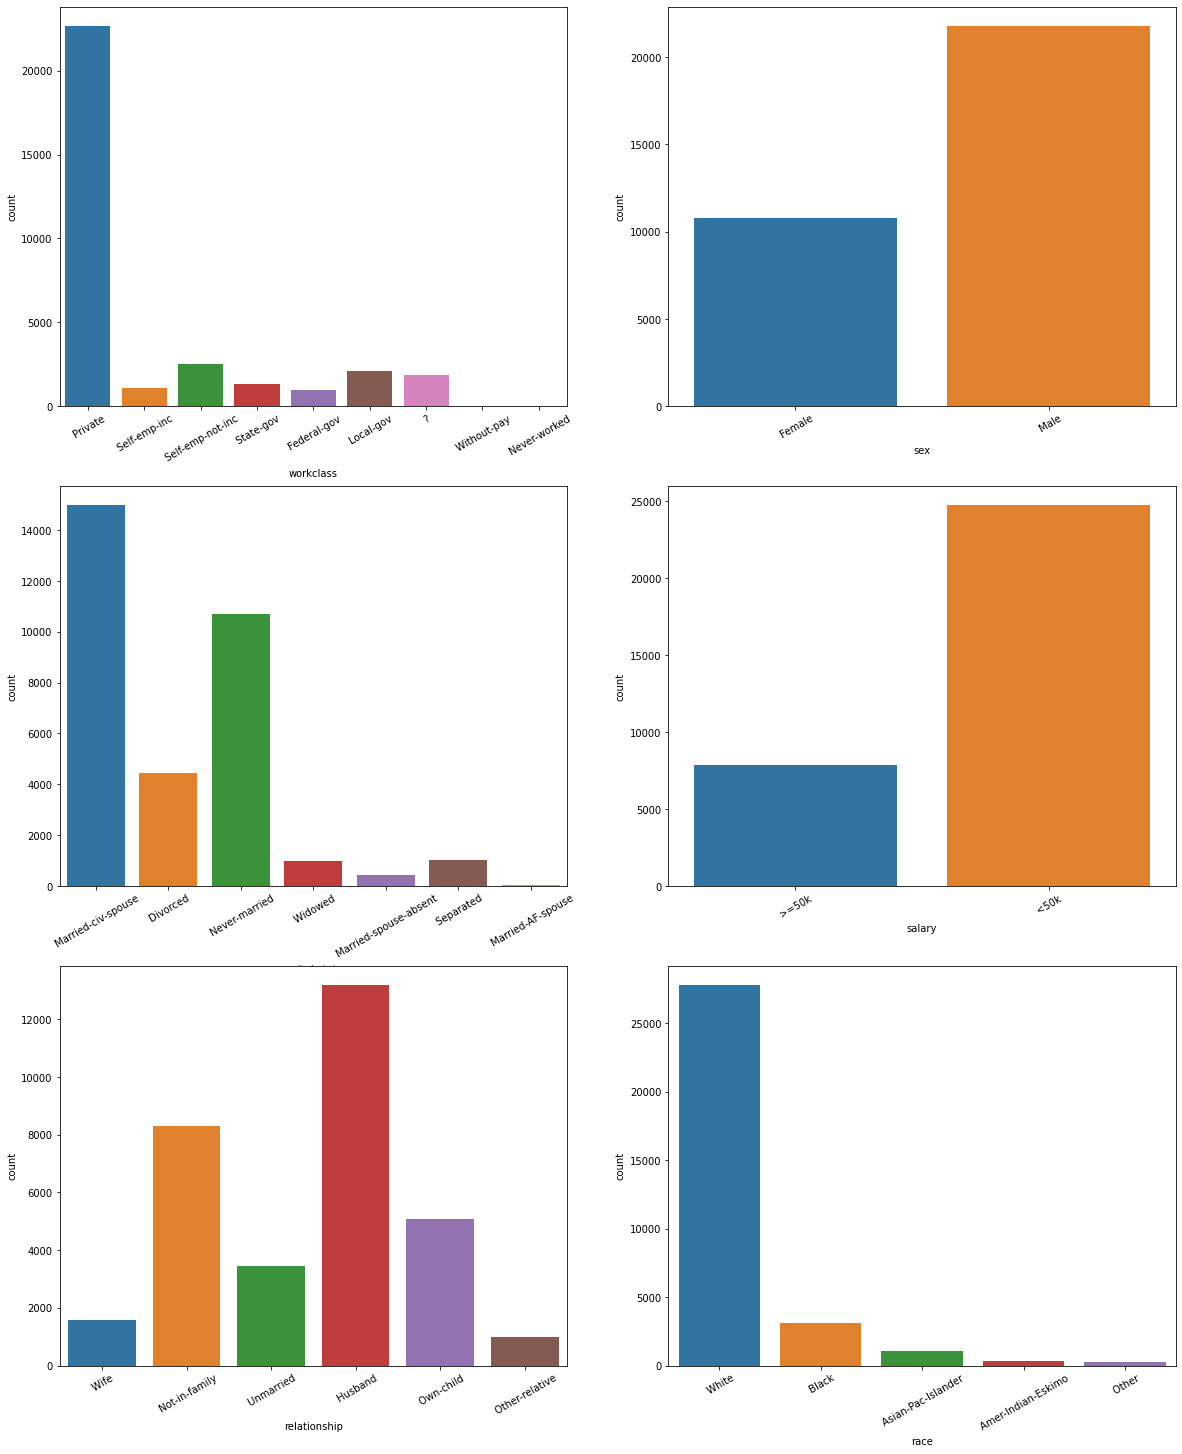

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(20,25))

g = sns.countplot(x='workclass',data=df,ax=axes[0,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g = sns.countplot(x='sex',data=df,ax=axes[0,1])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g = sns.countplot(x='marital-status',data=df,ax=axes[1,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g = sns.countplot(x='salary',data=df,ax=axes[1,1])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g = sns.countplot(x='relationship',data=df,ax=axes[2,0])
g.set_xticklabels(g.get_xticklabels(), rotation=30)

g = sns.countplot(x='race',data=df,ax=axes[2,1])
g.set_xticklabels(g.get_xticklabels(), rotation=30,fontsize=10)

[Text(0, 0, ' Private'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' State-gov'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

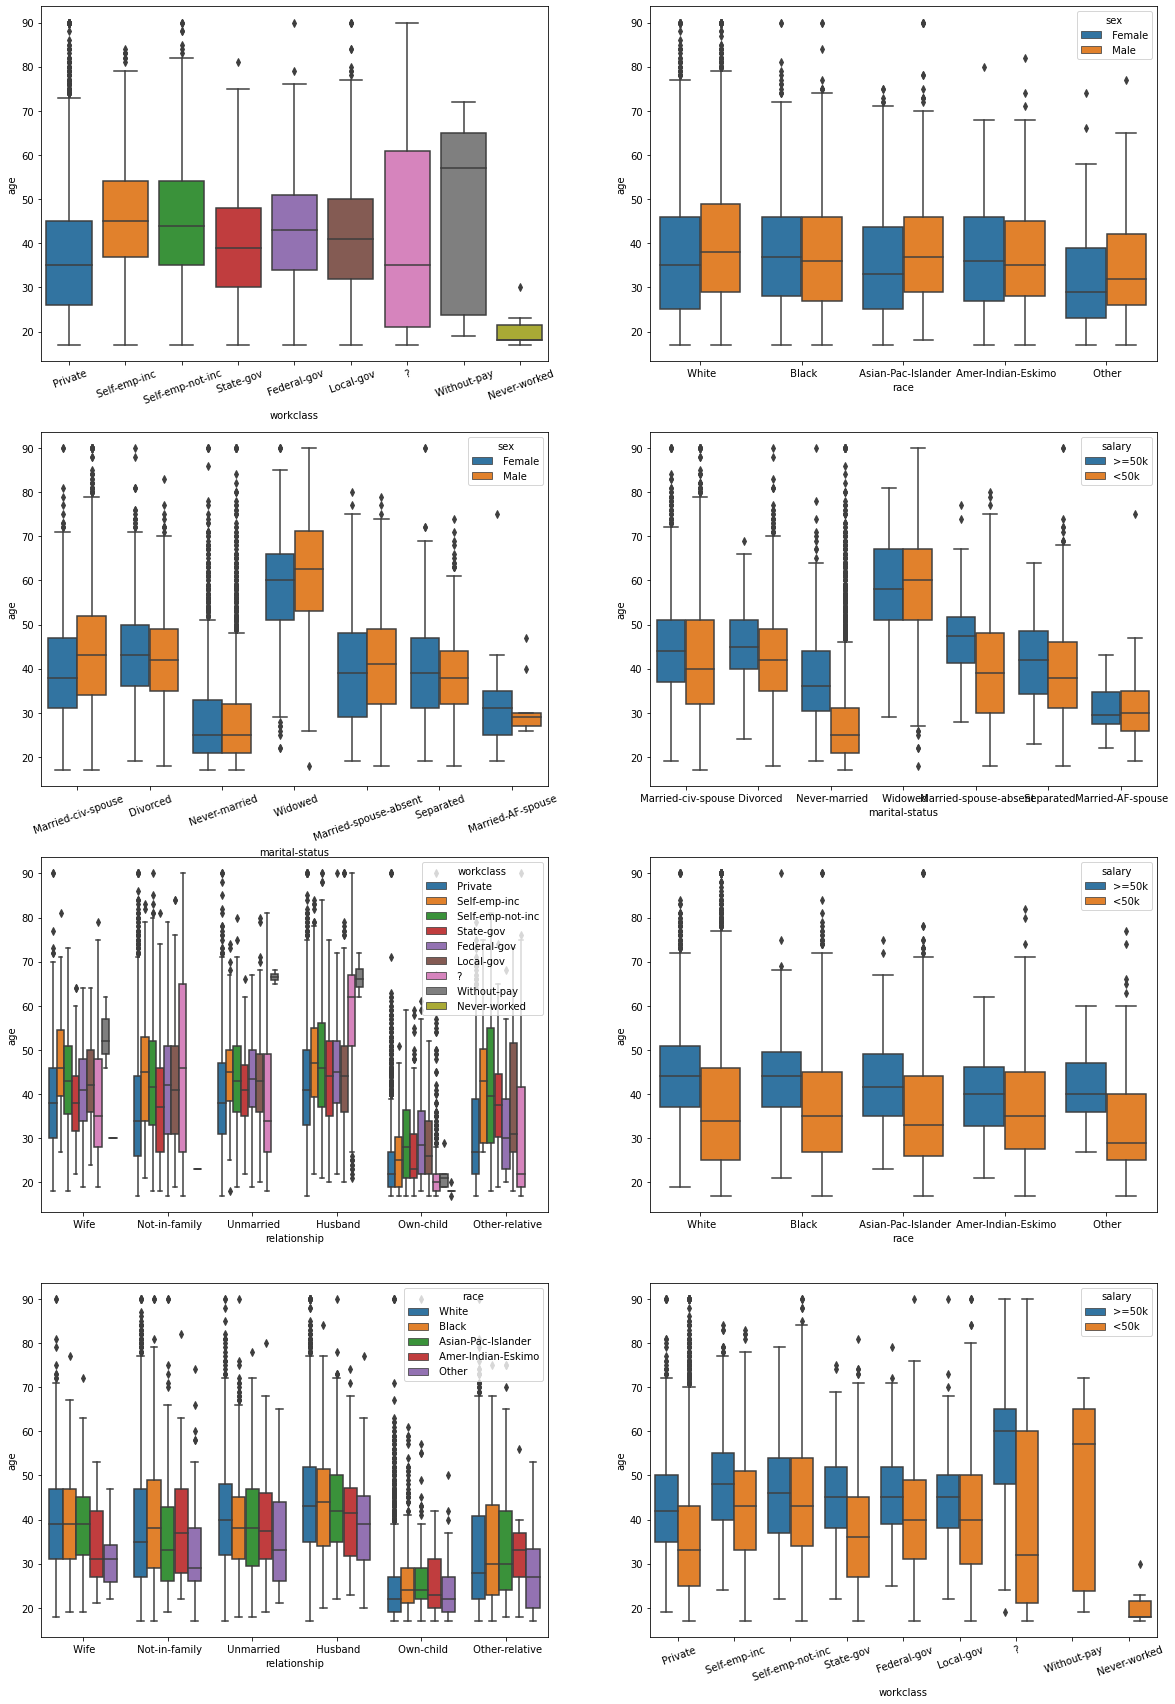

In [ ]:
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(20,30))

g = sns.boxplot(x='workclass',data=df,ax=axes[0,0],y='age')
g.set_xticklabels(g.get_xticklabels(), rotation=20)

g = sns.boxplot(x='race',data=df,ax=axes[0,1],y='age',hue="sex")


g = sns.boxplot(x='marital-status',data=df,ax=axes[1,0],y='age',hue="sex")
g.set_xticklabels(g.get_xticklabels(), rotation=20)

g = sns.boxplot(x='marital-status',data=df,ax=axes[1,1],y='age',hue="salary")


g = sns.boxplot(x='relationship',data=df,ax=axes[2,0],y='age',hue="workclass")


g = sns.boxplot(x='race',data=df,ax=axes[2,1],y='age',hue="salary")


g = sns.boxplot(x='relationship',y='age',hue='race',data=df,ax=axes[3,0])

g = sns.boxplot(x='workclass',y='age',hue='salary',data=df,ax=axes[3,1])
g.set_xticklabels(g.get_xticklabels(), rotation=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


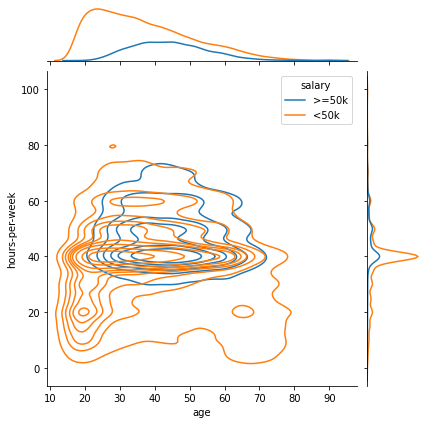

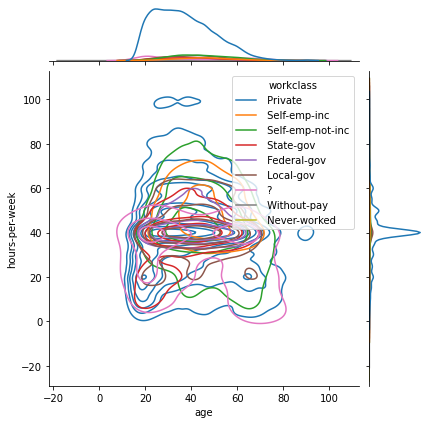

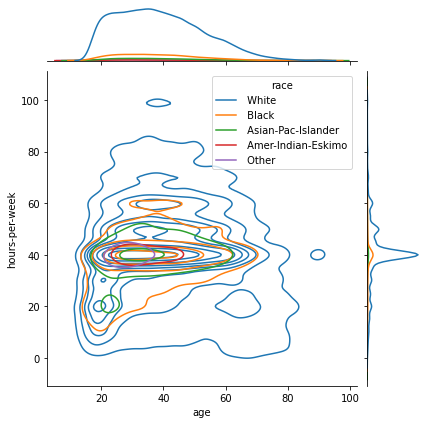

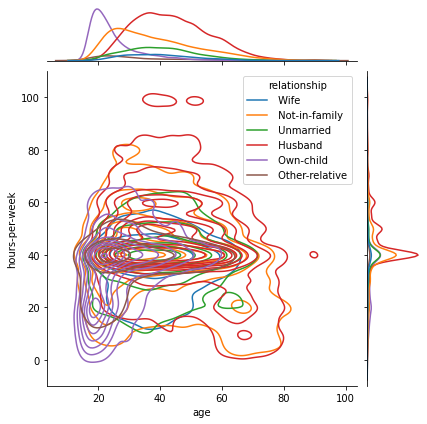

In [ ]:
sns.jointplot(data=df, x="age", y="hours-per-week", hue="salary",kind="kde")

sns.jointplot(data=df, x="age", y="hours-per-week", hue="workclass",kind="kde")

sns.jointplot(data=df, x="age", y="hours-per-week", hue="race",kind="kde")

sns.jointplot(data=df, x="age", y="hours-per-week", hue="relationship",kind="kde")

### making dataloader

**TabularDataLoaders**
* `TabularDataLoaders.from_df`
 
* `TabularDataLoaders.from_csv`

> accept as arguments:<br>
`cat_names`: the names of the categorical variables<br>
`cont_names`: the names of the continuous variables<br>
`y_names`: the names of the dependent variables<br>
`y_block`: How to sub-categorize the type of y_names (CategoryBlock or RegressionBlock)<br>
`valid_idx`: the indices to use for the validation set (defaults to a random split otherwise)<br>
`bs`: the batch size<br>
`val_bs`: the batch size for the validation DataLoader (defaults to bs)<br>
`shuffle_train`: if we shuffle the training DataLoader or not<br>
`n`: overrides the numbers of elements in the dataset<br>
`device`: the PyTorch device to use (defaults to default_device())<br>
`reduce_memory`: fastai will attempt to reduce the overall memory usage by the inputted DataFrame with df_shrink<br>
`inplace`: If `True`, Tabular will not keep a separate copy of your original DataFrame in memory

### Tabular helper functions

* **`make_date(df, date_field)`** : make_date(df, date_field)
Make sure `df[date_field]` is of the right date type.
<br>

* **`add_datepart(df, field_name, prefix=None, drop=True, time=False)`**: Helper function that adds columns relevant to a date in the column field_name of df.
<br>

* **`add_elapsed_times(df, field_names, date_field, base_field)`**:Add in df for each event in `field_name`s the elapsed time according to `date_field` grouped by `base_field`.
<br>

* **`cont_cat_split(df, max_card=20, dep_var=None)`** :Helper function that returns column names of cont and cat variables from given df. If it is above the `max_card` parameter then it will be added to the `cont_names`.
<br>

* **`df_shrink_dtypes(df, skip=[], obj2cat=True, int2uint=False)`**: Return any possible smaller data types for DataFrame columns. Allows **object->category**, **int->uint**, and exclusion.
<br>

* **`df_shrink(df, skip=[], obj2cat=True, int2uint=False)`**: Reduce DataFrame memory usage, by casting to smaller types returned by `df_shrink_dtypes()`.


#### Procs

* **`Categorify(enc=None, dec=None, split_idx=None, order=None)`**:Transform the categorical variables to something similar to `pd.Categorical`
<br>

* **`FillMissing(fill_strategy=median, add_col=True, fill_vals=None)`**: Currently, filling with the median, a constant, and the mode are supported.
<br>

* **`Normalize(mean=None, std=None, axes=(0, 2, 3))`**

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
dls = TabularDataLoaders.from_df(df=df,
                                 path=path,
                                 procs=[Categorify,FillMissing,Normalize],
                                 cat_names=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                                 cont_names = ['age', 'fnlwgt', 'education-num'],
                                 y_names=['salary'],
                                 y_block=CategoryBlock,
                                 splits= RandomSplitter(valid_pct=0.2)(range_of(df)),
                                 bs=128)

In [ ]:
dls.show_batch()

In [ ]:
dls.dataset.xs.head()

workclass  education  marital-status  ...       age    fnlwgt  education-num
29823          5          2               1  ...  0.394161 -0.760585      -1.209827
21356          3         13               1  ...  1.492664  1.001271       1.535158
25560          5         10               1  ...  0.687095  0.020097       1.143017
23251          5         12               5  ... -0.777576  2.802527      -0.425546
24107          7         12               5  ... -1.436678 -1.451767      -0.425546

[5 rows x 10 columns]

In [ ]:
dls.dataset.ys.head()

salary
29823       0
21356       1
25560       0
23251       0
24107       0

### make learner

In [ ]:
learner = tabular_learner(dls,
                          layers = [200,100],
                          metrics = [accuracy, error_rate,Precision(),Recall(),F1Score()],
                          emb_szs = None,
                          )
learner.summary()

TabularModel (Input shape: 128 x torch.Size([128, 3]))
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 6             
Embedding                                 60         True      
____________________________________________________________________________
                     128 x 8             
Embedding                                 136        True      
____________________________________________________________________________
                     128 x 5             
Embedding                                 40         True      
____________________________________________________________________________
                     128 x 8             
Embedding                                 128        True      
____________________________________________________________________________
                     128 x 5             
Embedding                                 35         True      
___________________________________________

In [ ]:
learner.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=42, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [ ]:
svb = SaveModelCallback(with_opt=True, reset_on_fit=False)
erl = EarlyStoppingCallback(patience=10)

learner.add_cbs([svb, erl, ShowGraphCallback])

learner.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback, SaveModelCallback, EarlyStoppingCallback, ShowGraphCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
 

#### Train model

SuggestedLRs(lr_min=0.03630780577659607, lr_steep=0.02290867641568184)

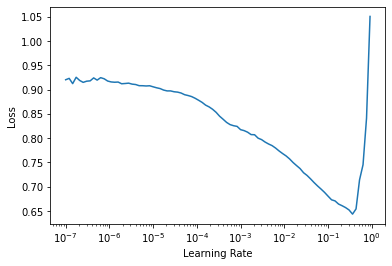

In [ ]:
learner.lr_find()

Better model found at epoch 0 with valid_loss value: 0.37199029326438904.


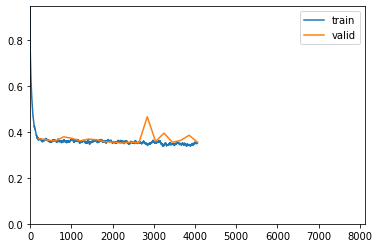

Better model found at epoch 1 with valid_loss value: 0.3661850392818451.
Better model found at epoch 2 with valid_loss value: 0.36108458042144775.
Better model found at epoch 8 with valid_loss value: 0.3575936257839203.
Better model found at epoch 9 with valid_loss value: 0.35704806447029114.
Better model found at epoch 10 with valid_loss value: 0.35185086727142334.
No improvement since epoch 10: early stopping


Better model found at epoch 0 with valid_loss value: 0.3513207733631134.


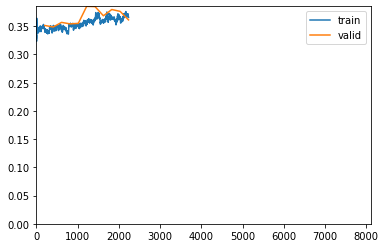

Better model found at epoch 1 with valid_loss value: 0.3486597239971161.
No improvement since epoch 1: early stopping


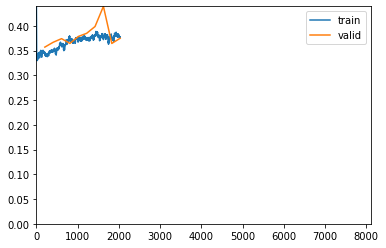

No improvement since epoch 0: early stopping


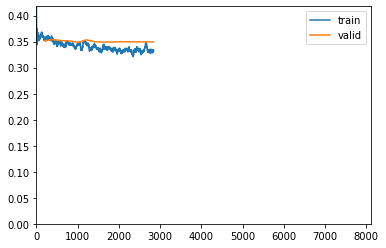

Epoch 1: reducing lr to 0.025
Epoch 5: reducing lr to 0.0125
Epoch 6: reducing lr to 0.00625
Epoch 7: reducing lr to 0.003125
Epoch 8: reducing lr to 0.0015625
Epoch 9: reducing lr to 0.00078125
Epoch 10: reducing lr to 0.000390625
Epoch 11: reducing lr to 0.0001953125
Epoch 12: reducing lr to 9.765625e-05
Epoch 13: reducing lr to 4.8828125e-05
Epoch 14: reducing lr to 2.44140625e-05
No improvement since epoch 4: early stopping


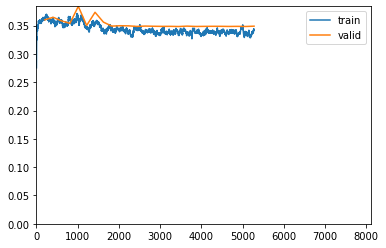

Epoch 1: reducing lr to 0.025
Epoch 4: reducing lr to 0.0125
Epoch 6: reducing lr to 0.00625
Epoch 7: reducing lr to 0.003125
Epoch 9: reducing lr to 0.0015625
Epoch 10: reducing lr to 0.00078125
Better model found at epoch 11 with valid_loss value: 0.3486023247241974.
Epoch 12: reducing lr to 0.000390625
Epoch 13: reducing lr to 0.0001953125
Epoch 14: reducing lr to 9.765625e-05
Epoch 15: reducing lr to 4.8828125e-05
Better model found at epoch 16 with valid_loss value: 0.3484501540660858.
Epoch 17: reducing lr to 2.44140625e-05
Epoch 18: reducing lr to 1.220703125e-05
Epoch 19: reducing lr to 6.103515625e-06
Epoch 20: reducing lr to 3.0517578125e-06
Epoch 21: reducing lr to 1.52587890625e-06
Epoch 22: reducing lr to 7.62939453125e-07
Epoch 23: reducing lr to 3.814697265625e-07
Epoch 24: reducing lr to 1.9073486328125e-07
Epoch 25: reducing lr to 9.5367431640625e-08
Epoch 26: reducing lr to 4.76837158203125e-08
No improvement since epoch 16: early stopping


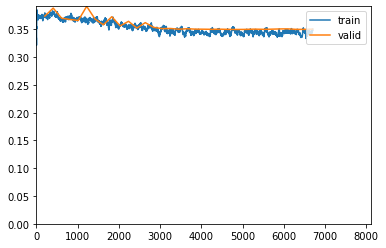

Epoch 1: reducing lr to 0.025
Epoch 5: reducing lr to 0.0125
Epoch 6: reducing lr to 0.00625
Epoch 8: reducing lr to 0.003125
Epoch 10: reducing lr to 0.0015625
Epoch 12: reducing lr to 0.00078125
Epoch 13: reducing lr to 0.000390625
Epoch 15: reducing lr to 0.0001953125
Epoch 17: reducing lr to 9.765625e-05
Epoch 18: reducing lr to 4.8828125e-05
Epoch 21: reducing lr to 2.44140625e-05
Epoch 24: reducing lr to 1.220703125e-05
Epoch 25: reducing lr to 6.103515625e-06
Epoch 26: reducing lr to 3.0517578125e-06
Epoch 27: reducing lr to 1.52587890625e-06
Epoch 28: reducing lr to 7.62939453125e-07
Epoch 29: reducing lr to 3.814697265625e-07
Epoch 30: reducing lr to 1.9073486328125e-07
Epoch 31: reducing lr to 9.5367431640625e-08
Epoch 32: reducing lr to 4.76837158203125e-08
Epoch 33: reducing lr to 2.384185791015625e-08
No improvement since epoch 23: early stopping


In [ ]:
learner.fit_one_cycle(40,lr_max=0.05,wd=0.0)
learner.fit_one_cycle(40,lr_max=0.05,wd=0.1)
learner.fit_one_cycle(40,lr_max=0.05,wd=1)

learner.fit(40,lr=0.05,cbs=[ReduceLROnPlateau(factor=2,min_lr=1e-08)],wd =0.0)
learner.fit(40,lr=0.05,cbs=[ReduceLROnPlateau(factor=2,min_lr=1e-08)],wd =0.1)
learner.fit(40,lr=0.05,cbs=[ReduceLROnPlateau(factor=2,min_lr=1e-08)],wd =1)

### Interpetation

In [ ]:
learner.show_results()

In [ ]:
classinter = ClassificationInterpretation.from_learner(learner)

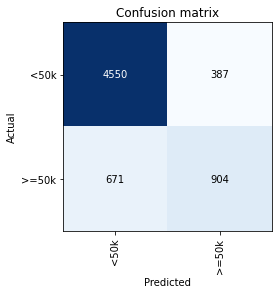

In [ ]:
classinter.plot_confusion_matrix()

In [ ]:
classinter.print_classification_report()

              precision    recall  f1-score   support

        <50k       0.87      0.92      0.90      4937
       >=50k       0.70      0.57      0.63      1575

    accuracy                           0.84      6512
   macro avg       0.79      0.75      0.76      6512
weighted avg       0.83      0.84      0.83      6512



---

## NLP

### Upgrading FastAI

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 188 kB 13.3 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 


### Import package

In [ ]:
from fastai.text.all import *

### downloading data

In [ ]:
path = untar_data(URLs.IMDB,force_download=True)
path.ls()

(#7) [Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/tmp_lm'),Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/test')]

#### reading README

In [ ]:
!less '/root/.fastai/data/imdb/README'

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

#### setting train paths

In [ ]:
train_dir = path/"train"
train_dir

Path('/root/.fastai/data/imdb/train')

In [ ]:
train_dir.ls()

(#4) [Path('/root/.fastai/data/imdb/train/unsupBow.feat'),Path('/root/.fastai/data/imdb/train/neg'),Path('/root/.fastai/data/imdb/train/labeledBow.feat'),Path('/root/.fastai/data/imdb/train/pos')]

In [ ]:
neg_dir = train_dir/'neg'
neg_dir.ls()

(#12500) [Path('/root/.fastai/data/imdb/train/neg/428_1.txt'),Path('/root/.fastai/data/imdb/train/neg/4231_1.txt'),Path('/root/.fastai/data/imdb/train/neg/10597_2.txt'),Path('/root/.fastai/data/imdb/train/neg/4184_4.txt'),Path('/root/.fastai/data/imdb/train/neg/6746_1.txt'),Path('/root/.fastai/data/imdb/train/neg/4399_4.txt'),Path('/root/.fastai/data/imdb/train/neg/1534_1.txt'),Path('/root/.fastai/data/imdb/train/neg/7054_2.txt'),Path('/root/.fastai/data/imdb/train/neg/1785_2.txt'),Path('/root/.fastai/data/imdb/train/neg/2131_2.txt')...]

In [ ]:
pos_dir = train_dir/'pos'
pos_dir.ls()

(#12500) [Path('/root/.fastai/data/imdb/train/pos/1815_10.txt'),Path('/root/.fastai/data/imdb/train/pos/1116_9.txt'),Path('/root/.fastai/data/imdb/train/pos/5014_9.txt'),Path('/root/.fastai/data/imdb/train/pos/4467_7.txt'),Path('/root/.fastai/data/imdb/train/pos/5808_10.txt'),Path('/root/.fastai/data/imdb/train/pos/9666_10.txt'),Path('/root/.fastai/data/imdb/train/pos/6692_9.txt'),Path('/root/.fastai/data/imdb/train/pos/8750_7.txt'),Path('/root/.fastai/data/imdb/train/pos/3354_10.txt'),Path('/root/.fastai/data/imdb/train/pos/4827_9.txt')...]

In [ ]:
!less '/root/.fastai/data/imdb/train/pos/1815_10.txt'

"May Contain Spoilers*<br /><br />"All Dogs Go to Heaven" is a great movie. I sa w it in 1989 when I was two years old. I didn't understand it that well but as I  saw it more and more times I started to love it. I love the songs in this movie . My favorite songs are "Let Me Be Surprised" and "Soon You'll Come Home". Those  are beautiful songs. The only thing that bothers me about the movie is Charlie  dieing. When I was little my sister couldn't even watch that part. Other than th at this movie is wonderful. <br /><br />My favorite part of the movie is when An nabelle and Charlie are flying around heaven. Heaven is beautiful in the movie a nd the "clocks" are very clever. I also love Itchy, in fact I have 3 dachshunds  of my own. They are so cute. <br /><br />Overall I love this movie and suggest e veryone should see it. I give this movie 10/10 stars.
(END)^C


### TextBlock

a `TransformerBlock` used for Text.
has two methods

* **TextBlock.from_df**
>`TextBlock.from_df(text_cols, vocab=None, is_lm=False, seq_len=72, backwards=False, min_freq=3, max_vocab=60000, tok=None, rules=None, sep=' ', n_workers=2, mark_fields=None, tok_text_col='text', **kwargs)`

* **TextBlock.from_folder**
>`TextBlock.from_folder(path, vocab=None, is_lm=False, seq_len=72, backwards=False, min_freq=3, max_vocab=60000, tok=None, rules=None, extensions=None, folders=None, output_dir=None, skip_if_exists=True, output_names=None, n_workers=2, encoding='utf8', **kwargs)`


if you want to train as **languege model** you should pas `is_lm=True`


#### DataBlock

generates vocab embedding

In [ ]:
imdb = DataBlock(blocks = TextBlock.from_folder(path=path,is_lm=True),
                 get_items = get_text_files,
                 splitter = RandomSplitter(0.1),
                 )

In [ ]:
dls = imdb.dataloaders(train_dir,verbose=3)

Found 25000 items
2 datasets of sizes 22500,2500
Setting up Pipeline: Tokenizer -> Numericalize
Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: 


In [ ]:
dls.show_batch(max_n=3)

### Learner

* **language_model_learner**:
>`language_model_learner(dls, arch, config=None, drop_mult=1.0, backwards=False, pretrained=True, pretrained_fnames=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))`

* **text_classifier_learner** :
> `text_classifier_learner(dls, arch, seq_len=72, config=None, backwards=False, pretrained=True, drop_mult=0.5, n_out=None, lin_ftrs=None, ps=None, max_len=1440, y_range=None, loss_func=None, opt_func=Adam, lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))`

In [ ]:
learner = language_model_learner(dls,AWD_LSTM,metrics=[accuracy,Perplexity()])

In [ ]:
learner.summary()

SequentialRNN (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     []                  
LSTM                                                           
LSTM                                                           
LSTM                                                           
RNNDropout                                                     
RNNDropout                                                     
RNNDropout                                                     
____________________________________________________________________________
                     64 x 72 x 60008     
Linear                                    24063208   True      
RNNDropout                                                     
____________________________________________________________________________

Total params: 24,063,208
Total trainable params: 24,063,208
Total non-trainable params: 0

Optimizer used: <function Adam at 0x7fd77df969e0>
Loss functio

In [ ]:
learner.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(60008, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60008, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=60008, bias=True)
    (output_dp): RNNDropout()
  )
)

#### adding callbacks

In [ ]:
grp = ShowGraphCallback
svm = SaveModelCallback(at_end=False,every_epoch=False,reset_on_fit=False)
esc = EarlyStoppingCallback(patience=10)

learner.add_cbs([grp,svm, esc])

learner.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback, SaveModelCallback, EarlyStoppingCallback, ShowGraphCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, ModelResetter, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : []
         - after_pred     : [RNNCallback]
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback, ShowGraphCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, ModelResetter, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
 

#### training

SuggestedLRs(valley=0.00363078061491251)

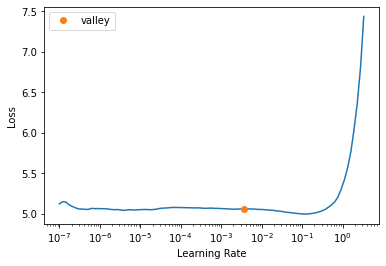

In [ ]:
learner.lr_find()

Better model found at epoch 0 with valid_loss value: 4.113447666168213.


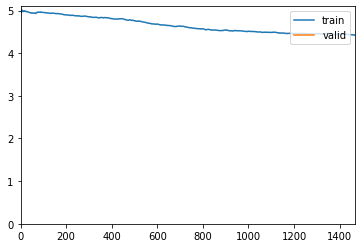

In [ ]:
learner.fine_tune(epochs=0,base_lr=0.003,freeze_epochs=1)

#### predicting

In [ ]:
learner.predict(text="hello",n_words=20,temperature=100)

'hello drenches cromartie chatterly compounds stumped disappointing myriad carnby godless delineating fangoria improvement rona rwanda caricatured canicule rumpled listlessly mediaeval gloomy'

### Saving learner

* **learner.save()**:saves all model 

* **learner.save_encoder()**: saves only first part and the `encoder` part of the model

* **learner.load_encoder()**: loads encoder part

### clasifier learner

In [ ]:
imdb = DataBlock(blocks=(TextBlock.from_folder(path,is_lm=False),CategoryBlock),
                 get_items=get_text_files,
                 get_y = parent_label,
                 splitter=GrandparentSplitter('train','test'))

In [ ]:
dls = imdb.dataloaders(path,verbose=3)

Found 100002 items
2 datasets of sizes 25000,25000
Setting up Pipeline: Tokenizer -> Numericalize
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: Pad_Chunk -- {'pad_idx': 1, 'pad_first': True, 'seq_len': 72}
Setting up after_batch: Pipeline: 


In [ ]:
dls.show_batch(max_n=5)

In [ ]:
dls.c

2

In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM,metrics=[accuracy,Recall(),Precision(),F1Score()])

In [ ]:
grp = ShowGraphCallback
svm = SaveModelCallback(at_end=False,every_epoch=False,reset_on_fit=False)
esc = EarlyStoppingCallback(patience=10)

learn.add_cbs([grp,svm, esc])

SuggestedLRs(valley=0.0030199517495930195)

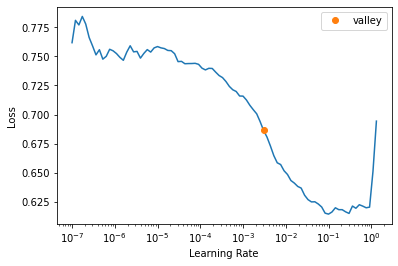

In [ ]:
learn.lr_find()

Better model found at epoch 0 with valid_loss value: 0.39271461963653564.


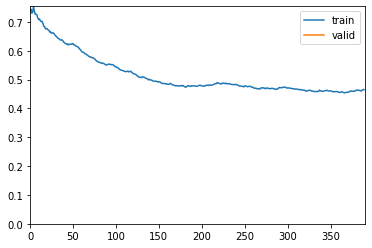

In [ ]:
learn.fine_tune(epochs=0,base_lr=0.003,freeze_epochs=1)

In [ ]:
learn.show_results(max_n=4)

In [ ]:
classinter = ClassificationInterpretation.from_learner(learn)

In [ ]:
classinter.plot_top_losses(3)

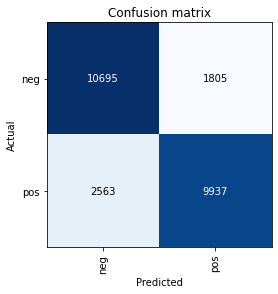

In [ ]:
classinter.plot_confusion_matrix()

In [ ]:
classinter.print_classification_report()

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83     12500
         pos       0.85      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



## Trasformers NLP